### IMPORTACION DE LIBRERIAS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.colors as pcolors

### CREAR UN DATA FRAME A PARTIR DE UN ARCHIVO CSV

In [3]:
df_hs = pd.read_csv('housing.csv')
df_hs

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

### VERIFICANDO LA TABLA DE DATOS
## Para visualizar si hay datos faltantes, duplicados, etc.


In [4]:
df_hs.info()  # Verificamos que en la columna total_bedrooms hay datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## LIMPIEZA DE DATOS.
# Eliminando campos con datos faltantes

In [5]:
df_hs.dropna(inplace=True) # dropna, metodo de panda que borra los datos faltantes, inplace=true modifica el dataframe original.
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df_hs.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

### BORRANDO DUPLICADOS

In [7]:
print(f'Tamano del dataframe antes de eliminar las filas repetidas: {df_hs.shape}')
df_hs.drop_duplicates(inplace=True)
print(f'Tamano del dataframe despues de eliminar las filas repetidas: {df_hs.shape}')

Tamano del dataframe antes de eliminar las filas repetidas: (20433, 10)
Tamano del dataframe despues de eliminar las filas repetidas: (20433, 10)


## Verificar errores tipograficos en variables categoricas

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\3589203288.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


<function matplotlib.pyplot.show(close=None, block=None)>

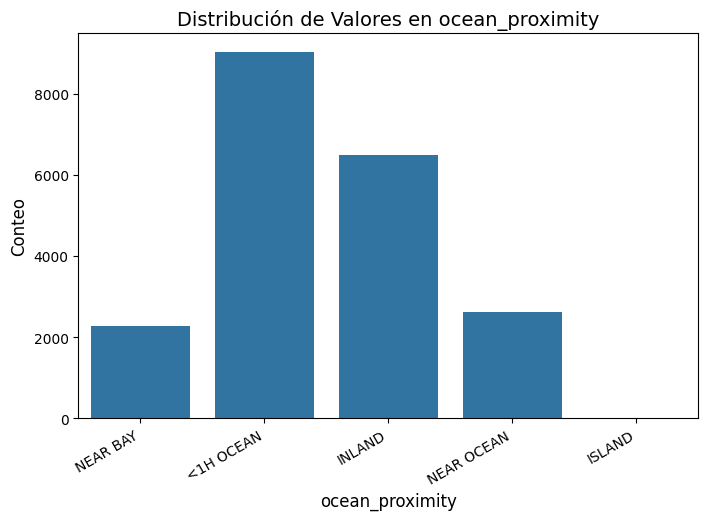

In [8]:
col_cat = 'ocean_proximity'
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(x=col_cat, data=df_hs, ax=ax)

ax.set_title(f'Distribución de Valores en {col_cat}', fontsize=14)
ax.set_xlabel(col_cat, fontsize=12)
ax.set_ylabel('Conteo', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.show



## VERIFICANDO SI HAY NUMEROS NEGATIVOS

In [9]:
df_sin_negativos_hma = df_hs[df_hs['housing_median_age'] < 0]
print(df_sin_negativos_hma)

df_sin_negativos_tr = df_hs[df_hs['total_rooms'] < 0]
print(df_sin_negativos_tr)

df_sin_negativos_tbr = df_hs[df_hs['total_bedrooms'] < 0]
print(df_sin_negativos_tbr)

df_sin_negativos_pop = df_hs[df_hs['population'] < 0]
print(df_sin_negativos_pop)

df_sin_negativos_ho = df_hs[df_hs['households'] < 0]
print(df_sin_negativos_ho)

df_sin_negativos_mic = df_hs[df_hs['median_income'] < 0]
print(df_sin_negativos_mic)

df_sin_negativos_mhv = df_hs[df_hs['median_house_value'] < 0]
print(df_sin_negativos_mhv)


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedr

### Crear columnas nuevas a partir de los datos de la columna **population, total_rooms, households**.

In [10]:
# 1. Habitaciones Promedio por Unidad Familiar (Rooms Per Household)
# Mide el tamano promedio de las viviendas. Un valor alto sugiere casas mas grandes.
df_hs['rooms_per_household'] = df_hs['total_rooms'] / df_hs['households']

# 2. Dormitorios promedio por Unidad Familiar (Bedrooms Per Households)
# Mide el numero promedio de dormitorios por unidad de viviendas
df_hs['bedrooms_per_household'] = df_hs['total_bedrooms'] / df_hs['households']

# 3. Proporcion de Dormitorios (Bedroom Ratio)
# Mide la distribucion del espacio. Un valor bajo sugiere que la casa tiene mas espacios comunes
# (salas, oficinas, etc.) en relacion con el numero de dormitorios. Esto sule indicar lujo.
df_hs['bedroom_ratio'] = df_hs['total_bedrooms'] / df_hs['total_rooms']

#4. Cantidad de habitantes por unidad falimiar (population_per_household)
# Mide la densidad de ocupacion. Un valor bajo podria indicar vecindarios o personas solas.
df_hs['population_per_household'] = df_hs['population'] / df_hs['households']

df_hs

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_household  \
0            NEAR BAY             6.984127                1.023810   
1            NEAR BAY             6.238137                0.971880   
2            NEAR BAY             8.288136                1.073446   
3            NEAR BAY             5.817352                1.073059   
4            NEAR BAY             6.281853                1.081081   
...               ...                  ...                     ...   
20635          INLAND             5.045455                1.133333   
20636          INLAND             6.114035                1.315789   
20637          INLAND             5.205543                1.120092   
20638          INLAND             5.329513                1.171920   
20639          INLAND             5.254717                1.162264   

       bedroom_ratio  population_per_household  
0           0.146591                  2.555556  
1           0.155797                  2.109842  
2           0.129516                  2.802260  
3           0.184458                  2.547945  
4           0.172096                  2.181467  
...              ...                       ...  
20635       0.224625                  2.560606  
20636       0.215208                  3.122807  
20637       0.215173                  2.325635  
20638       0.219892                  2.123209  
20639       0.221185                  2.616981  

[20433 rows x 14 columns]

## Verificar si hay datos outliers
### Imprimir un grafico de tipo histograma de cada columna con su mediana y su media para detectar sesgo de datos.
### Esto me permitira luego aplicar la formula para eliminar outliers. Metodo Standard o de Rango Intercuartilico(IQR)

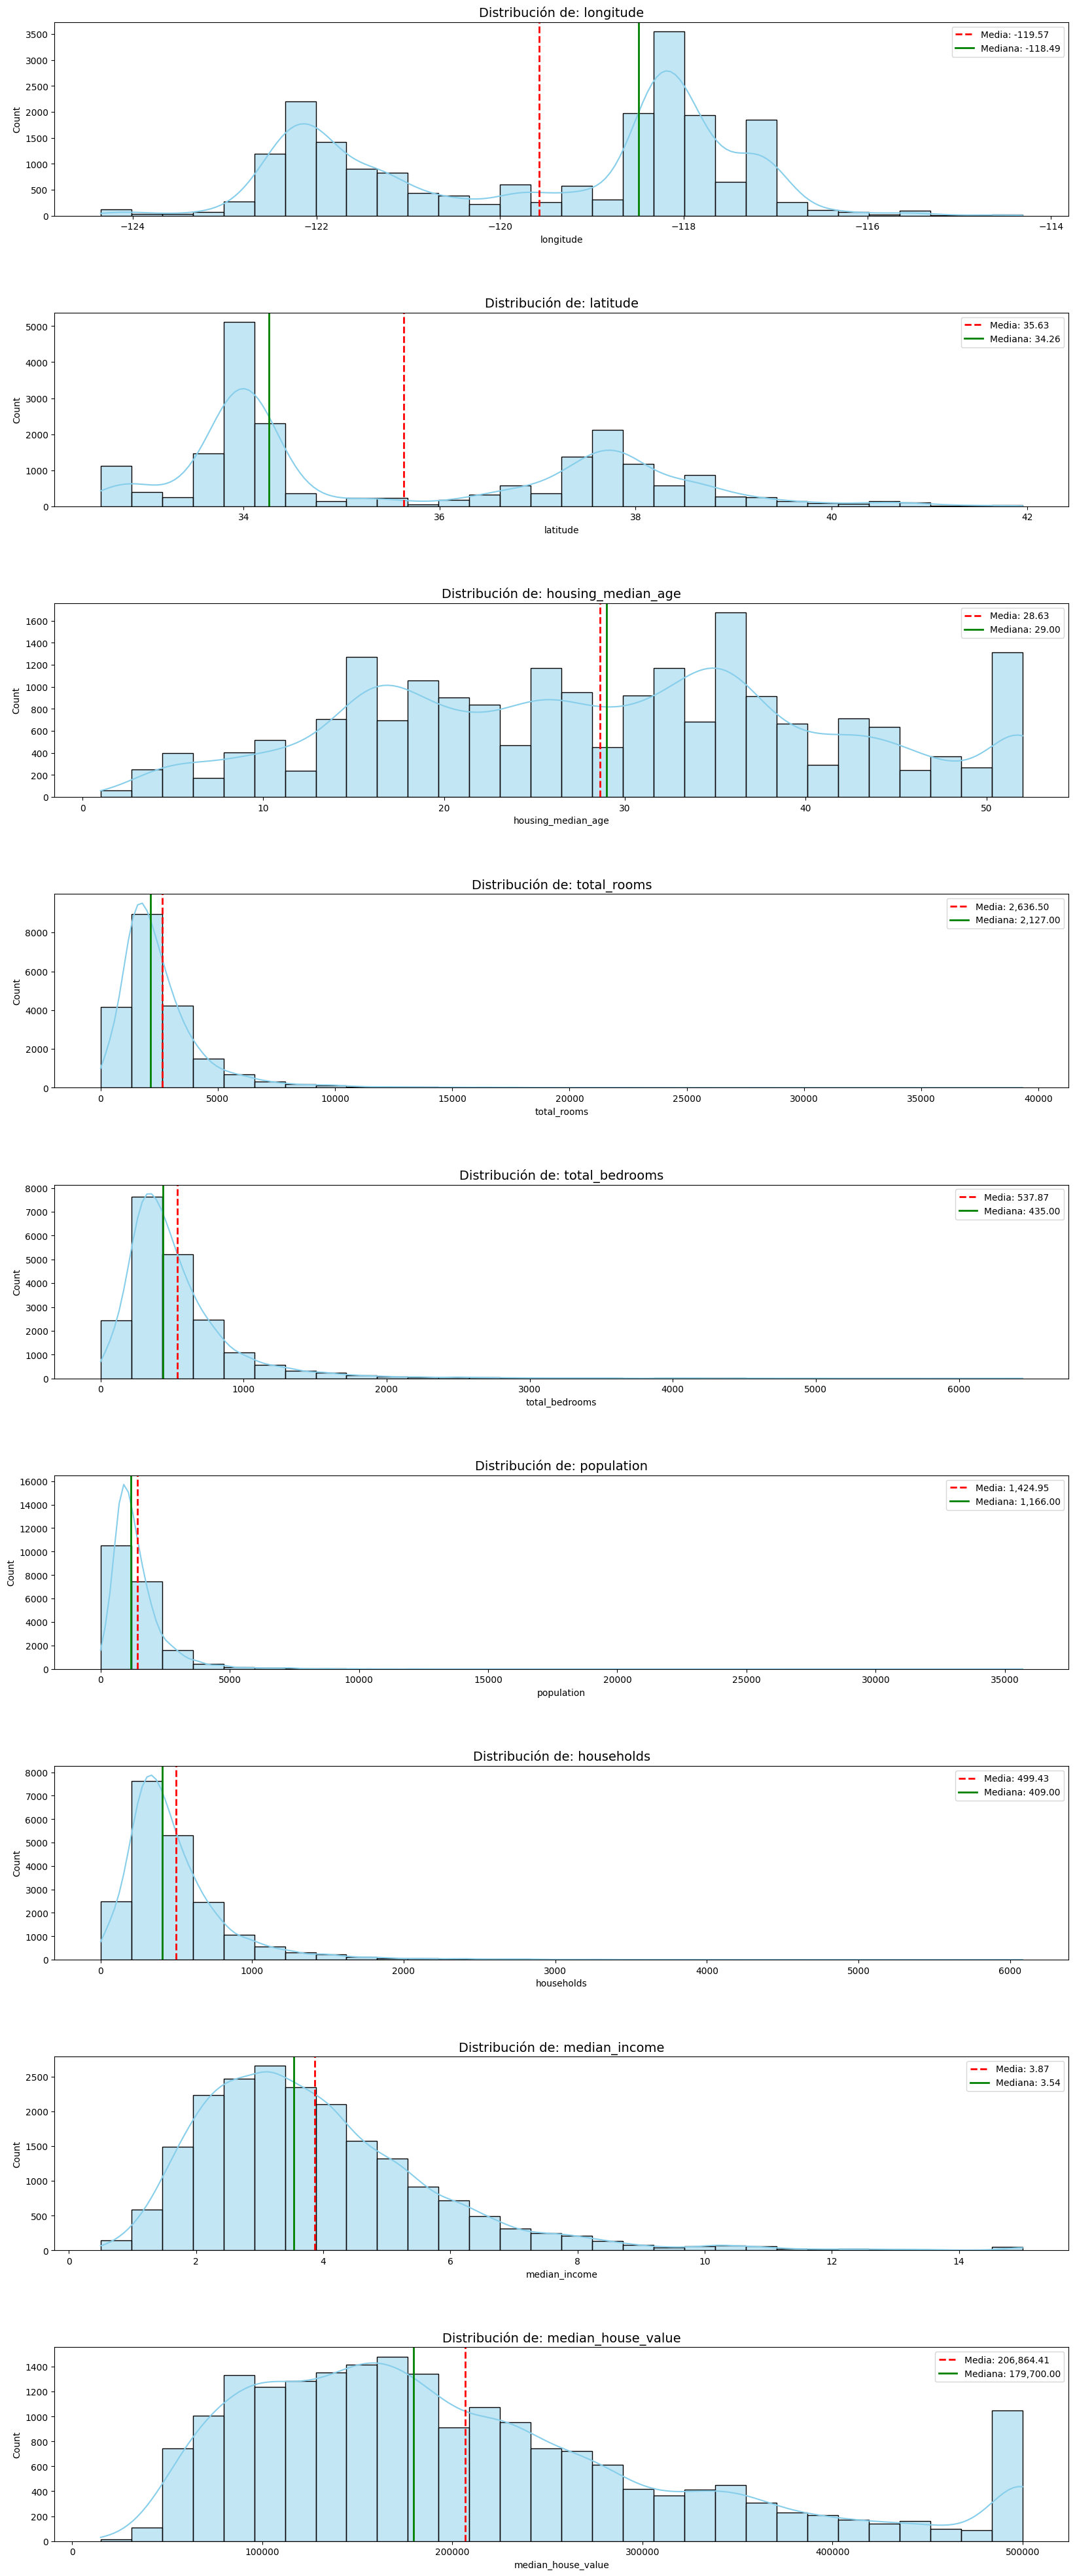

In [11]:
cols_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
fig, ax = plt.subplots(len(cols_num), ncols=1, figsize=(20,50)) # subplots crea una figura y multiples graficos en una sola columna
fig.subplots_adjust(hspace=0.5)  # matplotlib, metodo que se encarga de ajustar el espacio vertical entre los subgraficos dentro de una figura.

for i, col in enumerate(cols_num):
    media = df_hs[col].mean() # calcular la media de cada columna
    mediana = df_hs[col].median()  # calcular la mediana de cada columna.

    sns.histplot(x=col, data=df_hs, kde=True, bins=30, color='skyblue', ax=ax[i]) # grafico de seaborn tipo histograma incluyendo una curva de densidad.

    ax[i].axvline(
        media, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Media: {media:,.2f}' # Formato de número con 2 decimales
    )

    ax[i].axvline(
        mediana, 
        color='green', 
        linestyle='-', 
        linewidth=2,
        label=f'Mediana: {mediana:,.2f}' # Formato de número con 2 decimales
    )
    ax[i].set_title(f'Distribución de: {col}', fontsize=14)
    ax[i].legend()
plt.show()

## Calcular outliers total y limpiar el dataset
### Metodo Rango Intercualtilico(IQR)

In [12]:
# BORRAR DATOS DE LA COLUMANA median_house_value que tinen valores de 500000 para arriba

valor_maximo_dataset = df_hs['median_house_value'].max()

print(f"El valor exacto de la última barra (el límite superior) es: {valor_maximo_dataset}")

df_hs_limpio = df_hs[df_hs['median_house_value'] < 500001.0].copy()

print(f"Filas eliminadas (valor censurado): {len(df_hs) - len(df_hs_limpio)}")

df_hs_limpio.columns



El valor exacto de la última barra (el límite superior) es: 500001.0
Filas eliminadas (valor censurado): 958


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'bedroom_ratio', 'population_per_household'],
      dtype='object')

In [13]:
# Función para aplicar Capping con IQR

def aplicar_capping_iqr(df, columnas):
    """Calcula y aplica el límite superior (capping) con el método IQR (1.5 * IQR)."""
    # 1. Copiar dataframe para no modificar el original
    df_temp = df.copy()  
    
    # 2. Bucle sobre cada columna
    for col in columnas:

        # 3. Calculo de Cuartiles e IQR
        Q1 = df_temp[col].quantile(0.25) # Calcula el Cuartil 1 (Percentil 25)
        Q3 = df_temp[col].quantile(0.75) # Calcula el Cuartil 3 (Percentil 75)
        IQR = Q3 - Q1                    # Calcula el rango Intercuartil

        # 4. Calculo el limite superior
        limite_superior = Q3 + (1.5 * IQR)
        
        # 5. Filtrado y conteo de outliers
        filas_outlier = df_temp[df_temp[col] > limite_superior] # filtra las filas que superan el limite superior
        num_outliers = len(filas_outlier)                       # cuenta cuantas filas filtradas hay.
        
        # Muestra un resumen de lo que se va a limitar
        print(f"Columna '{col}': Limite Superior: {limite_superior:,.2f}. Outliers limitados: {num_outliers}")
        
        # 6. Aplicacion de capping
        # Reemplazar valores
        df_temp[col] = np.where(df_temp[col] > limite_superior,   # Condicion: si el valor actual es mayor que el limite
                                limite_superior,                  # Resultado Si Verdadero: reemplazalo con el limite superior
                                df_temp[col])                     # Resultado Si Falso: se mantiene el valor original

    return df_temp

# Lista de columnas a limpiar con Capping IQR
columnas_a_limpiar = [
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

# ¡Asegúrate de que df_hs_limpio sea el DataFrame que no contiene el valor censurado de median_house_value!
# Aplicar la función de capping
df_final = aplicar_capping_iqr(df_hs_limpio, columnas_a_limpiar)

# Ahora, recalcular los ratios con datos limpios
df_final['rooms_per_household'] = df_final['total_rooms'] / df_final['households']
df_final['bedroom_ratio'] = df_final['total_bedrooms'] / df_final['total_rooms']
df_final['population_per_household'] = df_final['population'] / df_final['households']

print("\nLimpieza de Outliers (Capping) y Recálculo de Ratios ¡Completado! 🎉")

df_final.info()


Columna 'total_rooms': Limite Superior: 5,633.50. Outliers limitados: 1247
Columna 'total_bedrooms': Limite Superior: 1,174.50. Outliers limitados: 1213
Columna 'population': Limite Superior: 3,163.50. Outliers limitados: 1118
Columna 'households': Limite Superior: 1,092.00. Outliers limitados: 1149
Columna 'median_income': Limite Superior: 7.67. Outliers limitados: 356

Limpieza de Outliers (Capping) y Recálculo de Ratios ¡Completado! 🎉
<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 19475 non-null  float64
 1   latitude                  19475 non-null  float64
 2   housing_median_age        19475 non-null  float64
 3   total_rooms               19475 non-null  float64
 4   total_bedrooms            19475 non-null  float64
 5   population                19475 non-null  float64
 6   household

## ELIMINAR COLUMNAS Y REEMPLAZAR POR LAS NUEVAS COLUMNAS CREADAS

In [14]:
# 1. Definir la lista de columnas a eliminar (Asegúrate que estos nombres sean EXACTOS)
columnas_a_eliminar = [
    'total_rooms',
    'total_bedrooms',
    'population',
    'households'
]

# 2. Eliminar las columnas del DataFrame
# # axis=1 indica que estamos eliminando columnas (no filas)
# # inplace=True modifica el DataFrame df_final directamente
df_final.drop(
    columns=columnas_a_eliminar, # Usar 'columns' en lugar de pasar directamente la lista
    axis=1,                      # el valor 1 de axis significa eliminar columnas. 
    inplace=True                 # modifica el data frame original df_final.
)

print("Columnas originales eliminadas:")
print(columnas_a_eliminar)
print("\nColumnas restantes en df_final:")
print(df_final.columns)

Columnas originales eliminadas:
['total_rooms', 'total_bedrooms', 'population', 'households']

Columnas restantes en df_final:
Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'bedroom_ratio', 'population_per_household'],
      dtype='object')


## VERIFICAR SI LAS NUEVAS COLUMNAS TIENEN NUMEROS NEGATIVOS

In [15]:
# 1. Creacion de una mascara booleana de comparacion 
df_sin_negativos_hma = df_final['housing_median_age'] < 0

# 2. Filtra las filas que solo tienen True, o sean filas con negativos.
df_sin_negativos_hma_filtrado = df_final[df_sin_negativos_hma]

# 3. Verifica si la variable filtrada esta vacia.
if df_sin_negativos_hma_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'housing_median_age'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'housing_median_age'!")

df_sin_negativos_mi = df_final['median_income'] < 0
df_sin_negativos_mi_filtrado = df_final[df_sin_negativos_mi]
if df_sin_negativos_mi_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'median_income'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'median_income'!")

df_sin_negativos_mhv = df_final['median_house_value'] < 0
df_sin_negativos_mhv_filtrado = df_final[df_sin_negativos_mhv]
if df_sin_negativos_mhv_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'median_house_value'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'median_house_value'!")

df_sin_negativos_rph = df_final['rooms_per_household'] < 0
df_sin_negativos_rph_filtrado = df_final[df_sin_negativos_rph]
if df_sin_negativos_rph_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'rooms_per_household'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'rooms_per_household'!")

df_sin_negativos_bph = df_final['bedrooms_per_household'] < 0
df_sin_negativos_bph_filtrado = df_final[df_sin_negativos_bph]
if df_sin_negativos_bph_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'bedrooms_per_household'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'bedrooms_per_household'!")

df_sin_negativos_br = df_final['bedroom_ratio'] < 0
df_sin_negativos_br_filtrado = df_final[df_sin_negativos_br]
if df_sin_negativos_br_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'bedroom_ratio'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'bedroom_ratio'!")

df_sin_negativos_pph = df_final['population_per_household'] < 0
df_sin_negativos_pph_filtrado = df_final[df_sin_negativos_pph]
if df_sin_negativos_pph_filtrado.empty:
    print("El DataFrame filtrado está vacío: ¡No hay valores negativos en 'population_per_household'!")
else:
    print("El DataFrame filtrado no esta vacío: ¡Tiene valores negativos en 'population_per_household'!")
    
    




El DataFrame filtrado está vacío: ¡No hay valores negativos en 'housing_median_age'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'median_income'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'median_house_value'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'rooms_per_household'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'bedrooms_per_household'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'bedroom_ratio'!
El DataFrame filtrado está vacío: ¡No hay valores negativos en 'population_per_household'!


# PROCESO DE ANALISIS DE DATOS
## Analisis exploratorio de Datos (EDA)
### 1. Analisis de correlacion

--- 1. Correlación de las variables con el Valor de la Vivienda ---
median_income               0.644533
rooms_per_household         0.103217
housing_median_age          0.068595
population_per_household   -0.039221
longitude                  -0.046187
bedrooms_per_household     -0.061081
latitude                   -0.148637
bedroom_ratio              -0.215311
Name: median_house_value, dtype: float64


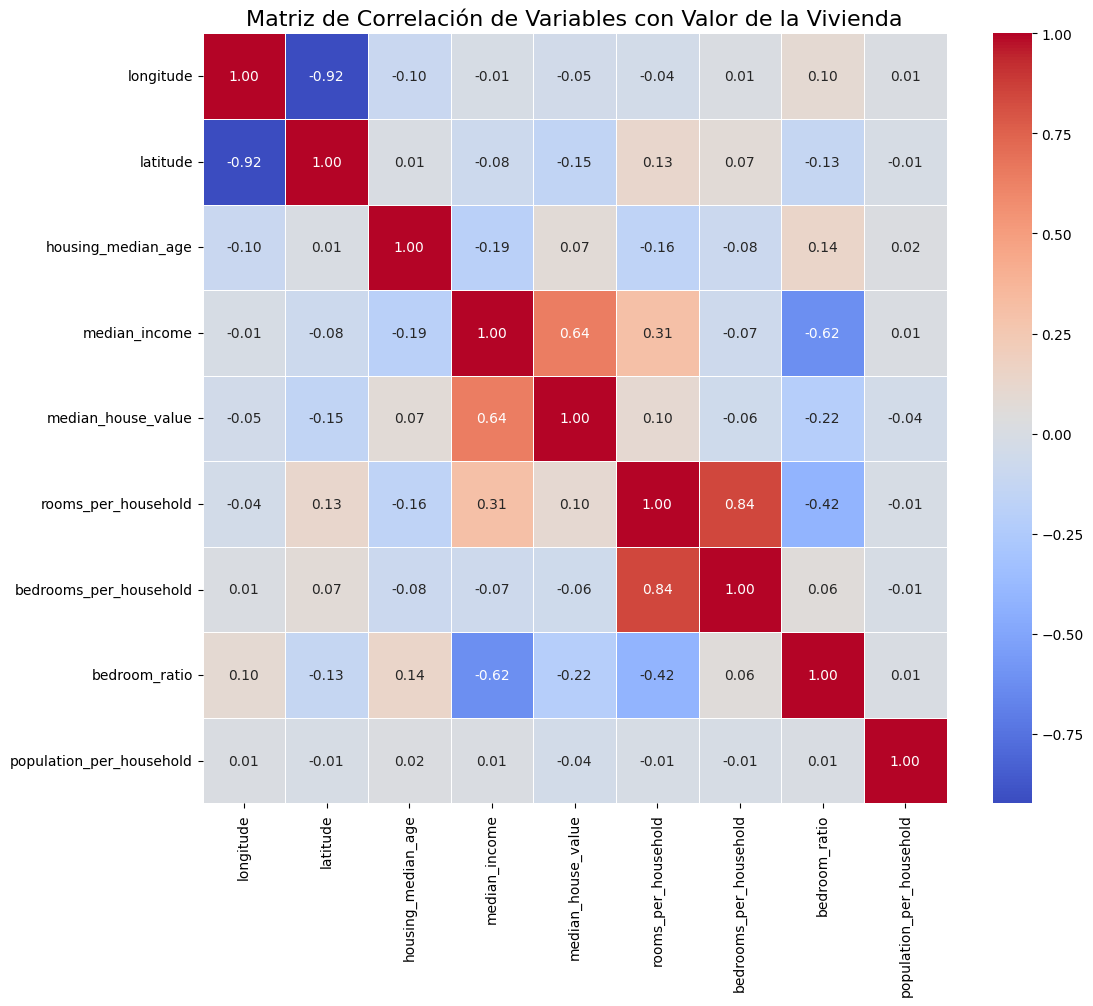

In [16]:
# ANALISIS DE CORRELACIONES DE DATOS
# 1. Seleccionar y almacenar los nombres de todas las columnas que contienen datos numericas del dataframe en una variable.
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

# 2. Calculo principal del analisis de correlacion para todas las variables numericas
# El método .corr() calcula el coeficiente de Pearson entre todas las parejas de variables.
matriz_correlacion_nueva = df_final[numeric_columns].corr()

# --- Análisis: Correlación con la variable objetivo ---

print("--- 1. Correlación de las variables con el Valor de la Vivienda ---")

# 3. Analizar la realacion de todas las demas variables con una variable objetivo espesifica (median_house_value)
correlacion_con_precio = matriz_correlacion_nueva['median_house_value'].sort_values(ascending=False)

# Usamos .drop() para eliminar la correlación de la variable consigo misma (que siempre es 1.0)
print(correlacion_con_precio.drop('median_house_value'))

# --- Visualización: Mapa de Calor (Heatmap) ---

plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion_nueva,
    annot=True,          # Mostrar el valor del coeficiente en cada celda
    cmap='coolwarm',     # Esquema de color: rojo/azul para negativo/positivo
    fmt=".2f",           # Formato a dos decimales
    linewidths=.5,       # Líneas para separar las celdas
    cbar=True            # Mostrar la barra de color
)
plt.title('Matriz de Correlación de Variables con Valor de la Vivienda', fontsize=16)
plt.show()

## CREAR GRAFICOS PARA COMPARAR CON la columna "median_house_value"

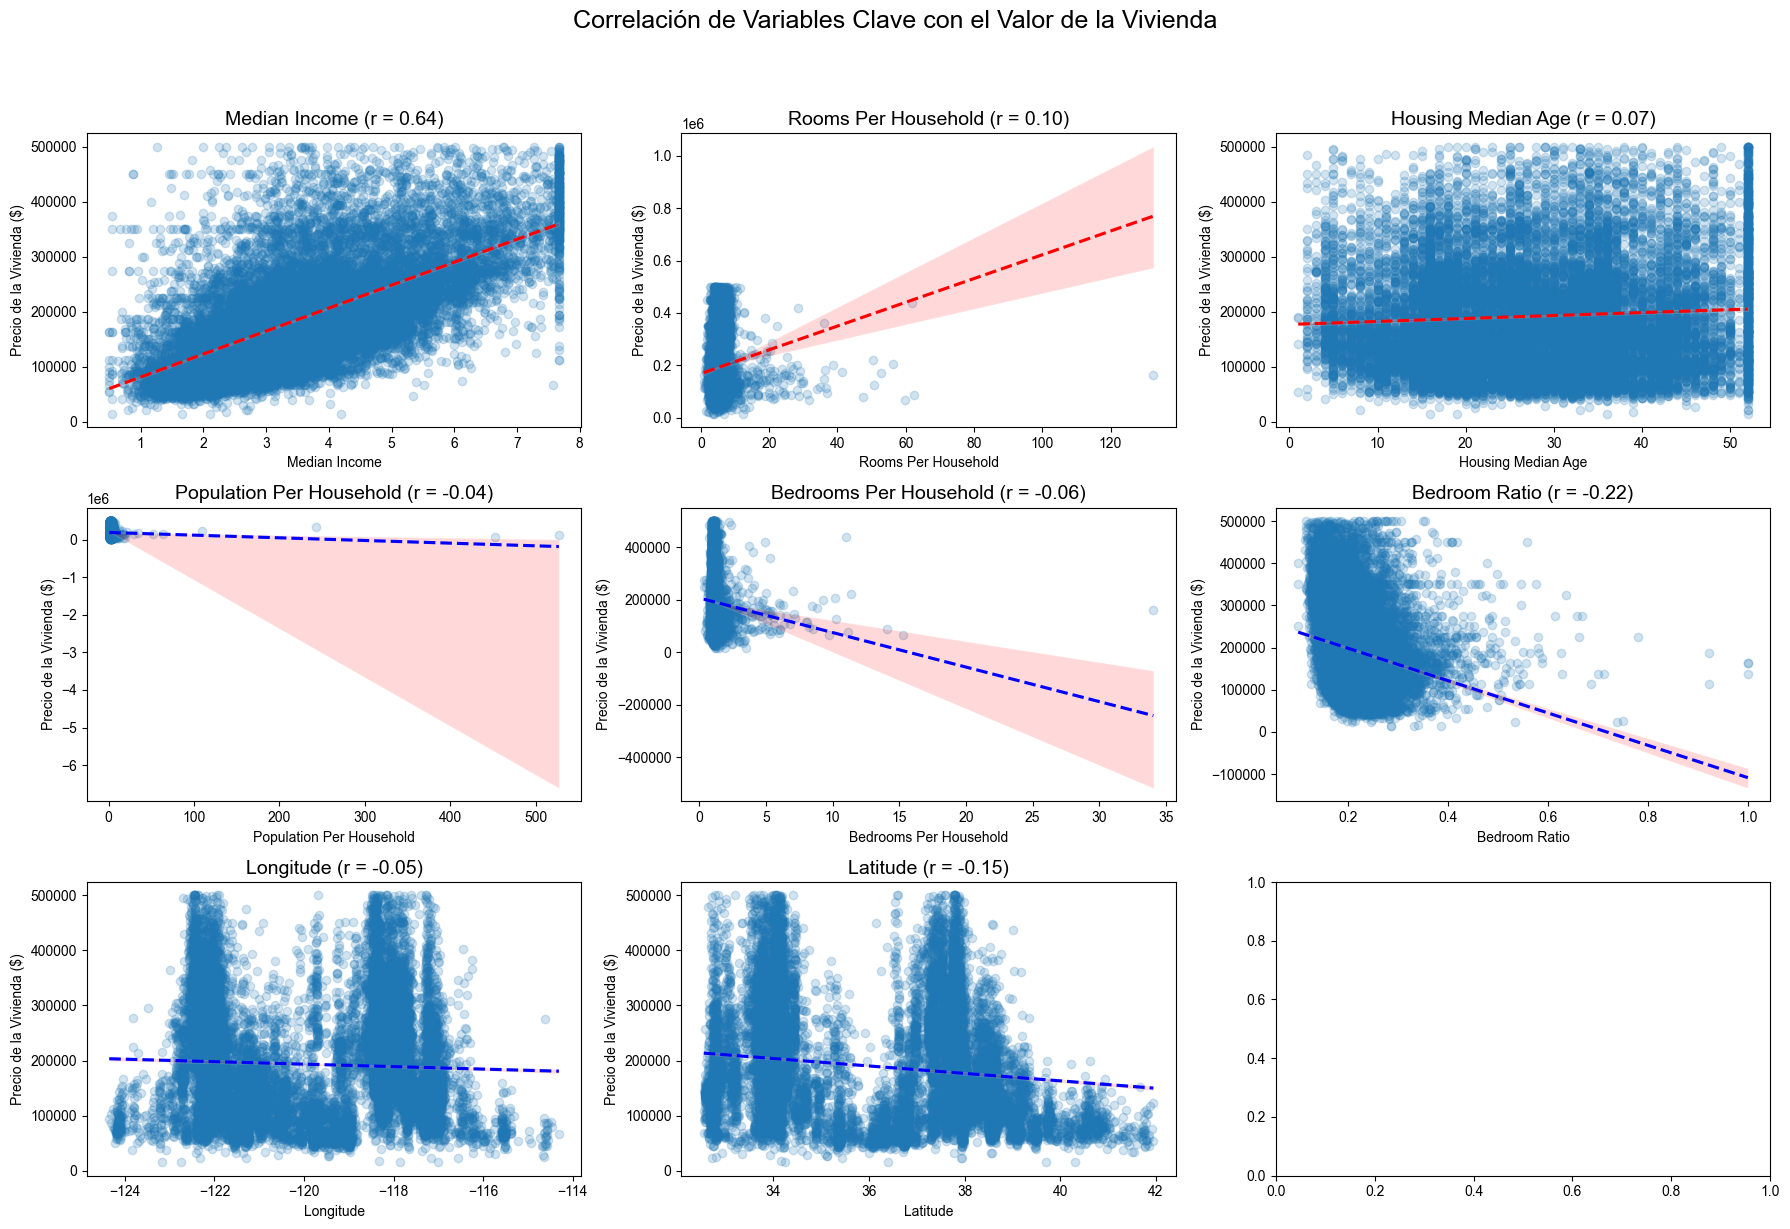

In [17]:
# Lista de variables a comparar con median_house_value
variables_a_comparar = [
    'median_income',
    'rooms_per_household',
    'housing_median_age',
    'population_per_household',
    'bedrooms_per_household',
    'bedroom_ratio',
    'longitude',
    'latitude'
]

# Configuración de la cuadrícula: 2 filas y 3 columnas (para 6 gráficos)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
plt.suptitle('Correlación de Variables Clave con el Valor de la Vivienda', fontsize=18, y=1.02)
sns.set_style("whitegrid")

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Bucle para generar cada gráfico con Seaborn
for i, col in enumerate(variables_a_comparar):
    # Calcular la correlación r
    r = df_final[col].corr(df_final['median_house_value'])
    
    # Usar sns.regplot (función de Seaborn) para incluir la línea de regresión
    sns.regplot(
        x=col,
        y='median_house_value',
        data=df_final,
        # Configuración de los puntos y la línea
        scatter_kws={'alpha': 0.2}, # configuracion de transparencia de los puntos
        line_kws={'color': 'red', 'linestyle': '--'}, 
        ci=95, # Configuracion Banda de confianza
        ax=axes[i] # <-- ¡Aquí es donde le decimos a Seaborn en qué subplot dibujar!
    )
    
    # Configurar el título y etiquetas usando los métodos del objeto Axis (Matplotlib)
    axes[i].set_title(f'{col.replace("_", " ").title()} (r = {r:.2f})', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Precio de la Vivienda ($)')
    
    # Cambiar el color de la línea de regresión si la correlación es negativa
    # Accedemos a la línea dibujada por regplot a través del eje.
    if r < 0:
        axes[i].lines[0].set_color('blue')
        
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajuste para el super título
plt.show()

### VERIFICAR OUTLIERS PARA 
### population_per_household, bedrooms_per_household, bedroom_ratio

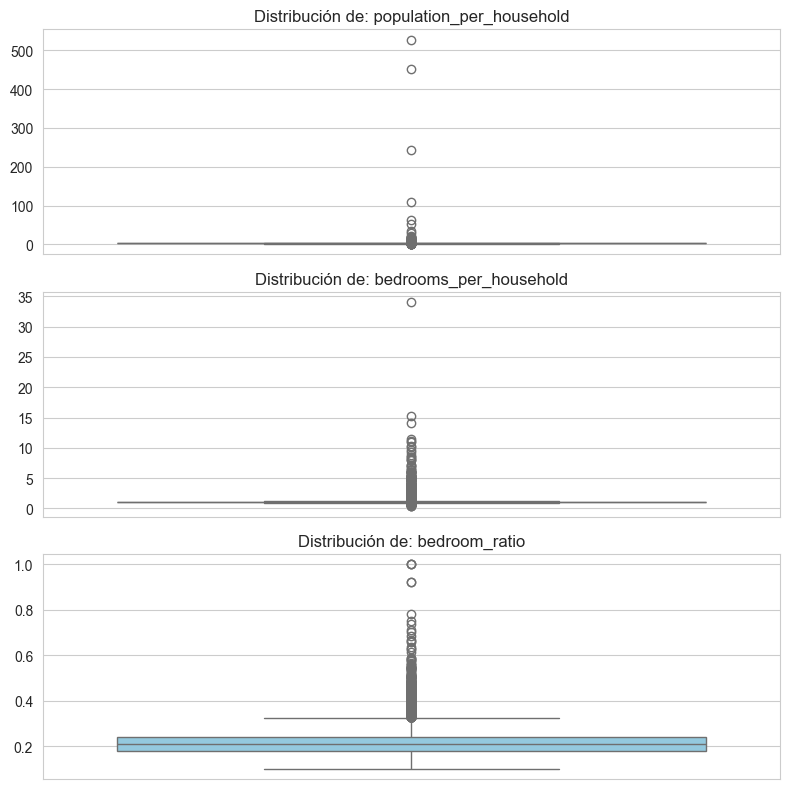

In [18]:
# 1. Definir las columnas numéricas a visualizar
columnas_boxplot = ['population_per_household', 'bedrooms_per_household', 'bedroom_ratio']

# 2. Configurar la cuadrícula (ej. 2 filas, 2 columnas)
# len(columnas_boxplot) // 2 da 2 filas
# ncols=2 da 2 columnas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

# Aplanar el arreglo de ejes para facilitar el bucle
axes = axes.flatten()

# 3. Iterar y generar Box Plots
for i, col in enumerate(columnas_boxplot):
    # Dibuja el boxplot en el i-ésimo eje (axes[i])
    sns.boxplot(y=df_final[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de: {col}', fontsize=12)
    axes[i].set_ylabel('') # Ocultar la etiqueta Y para limpiar el gráfico

plt.tight_layout() # Ajusta automáticamente el espaciado
plt.show()

### ANALISIS OUTLIERS PARA:
### population_per_household, bedrooms_per_household, bedroom_ratio

In [19]:
# 1. Definición de las columnas a analizar
columnas_a_analizar = [
    'population_per_household', 
    'bedrooms_per_household', 
    'bedroom_ratio'
]

print("--- Análisis de Outliers por el Método IQR (1.5 * IQR) ---")
print("-" * 50)

# 2. Bucle para analizar cada columna
for col in columnas_a_analizar:
    # Cálculo de Cuartiles y IQR
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definición del Límite Superior
    limite_superior = Q3 + (1.5 * IQR)

    # Conteo de Outliers
    num_outliers = len(df_final[df_final[col] > limite_superior])

    # Impresión de Resultados
    print(f"Columna: {col}")
    print(f"  Q1 (25%): {Q1:,.2f}")
    print(f"  Q3 (75%): {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Superior (1.5*IQR): {limite_superior:,.2f}")
    print(f"  Número de Outliers (Valores > Límite): {num_outliers}")
    print("-" * 50)

--- Análisis de Outliers por el Método IQR (1.5 * IQR) ---
--------------------------------------------------
Columna: population_per_household
  Q1 (25%): 2.46
  Q3 (75%): 3.27
  IQR: 0.81
  Límite Superior (1.5*IQR): 4.48
  Número de Outliers (Valores > Límite): 711
--------------------------------------------------
Columna: bedrooms_per_household
  Q1 (25%): 1.01
  Q3 (75%): 1.10
  IQR: 0.09
  Límite Superior (1.5*IQR): 1.24
  Número de Outliers (Valores > Límite): 1172
--------------------------------------------------
Columna: bedroom_ratio
  Q1 (25%): 0.18
  Q3 (75%): 0.24
  IQR: 0.06
  Límite Superior (1.5*IQR): 0.33
  Número de Outliers (Valores > Límite): 671
--------------------------------------------------


### APLICAR CAPPING PARA:
### population_per_household, bedrooms_per_household, bedroom_ratio

In [20]:
# 1. Definimos la lista de columnas (solo 'population_per_household' en este caso)
columnas_para_capping = ['population_per_household', 'bedrooms_per_household', 'bedroom_ratio']

# 2. Aplicamos la función (esta función reportará el límite de 4.48 y el conteo de 711)
df_final_capped = aplicar_capping_iqr(df_final, columnas_para_capping)

# 3. Reemplazamos el DataFrame original (o creamos uno nuevo)
df_final = df_final_capped

Columna 'population_per_household': Limite Superior: 4.48. Outliers limitados: 711
Columna 'bedrooms_per_household': Limite Superior: 1.24. Outliers limitados: 1172
Columna 'bedroom_ratio': Limite Superior: 0.33. Outliers limitados: 671


### GENERAR NUEVO GRAFICO DE CALOR CON EL DATAFRAME ACTUALIZADO

--- 1. Correlación de las variables con el Valor de la Vivienda ---
median_income               0.644533
rooms_per_household         0.103217
housing_median_age          0.068595
longitude                  -0.046187
bedrooms_per_household     -0.120889
latitude                   -0.148637
bedroom_ratio              -0.254930
population_per_household   -0.255929
Name: median_house_value, dtype: float64


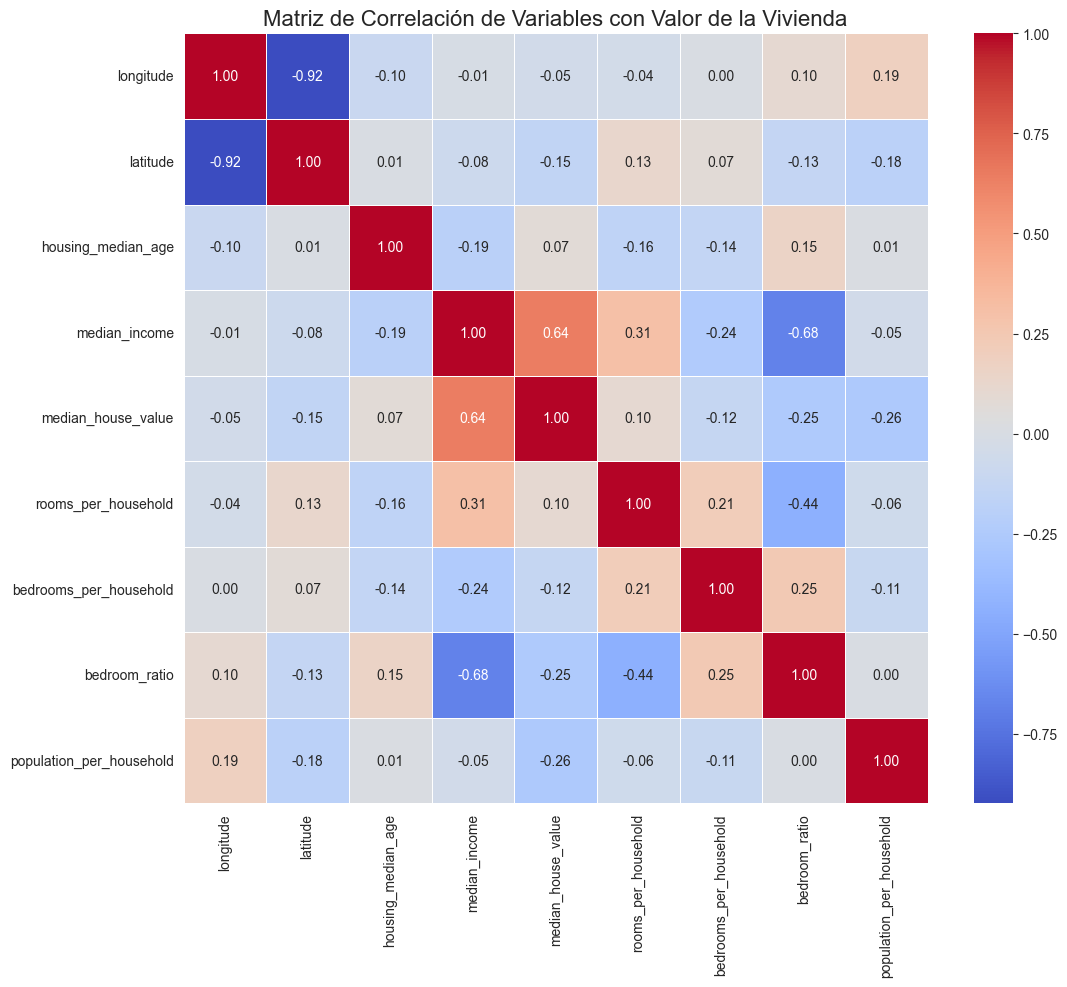

In [21]:
# ANALISIS DE CORRELACIONES DE DATOS
# 1. Seleccionar y almacenar los nombres de todas las columnas que contienen datos numericas del dataframe en una variable.
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

# 2. Calculo principal del analisis de correlacion para todas las variables numericas
# El método .corr() calcula el coeficiente de Pearson entre todas las parejas de variables.
matriz_correlacion_nueva = df_final[numeric_columns].corr()

# --- Análisis: Correlación con la variable objetivo ---

print("--- 1. Correlación de las variables con el Valor de la Vivienda ---")

# 3. Analizar la realacion de todas las demas variables con una variable objetivo espesifica (median_house_value)
correlacion_con_precio = matriz_correlacion_nueva['median_house_value'].sort_values(ascending=False)

# Usamos .drop() para eliminar la correlación de la variable consigo misma (que siempre es 1.0)
print(correlacion_con_precio.drop('median_house_value'))

# --- Visualización: Mapa de Calor (Heatmap) ---

plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion_nueva,
    annot=True,          # Mostrar el valor del coeficiente en cada celda
    cmap='coolwarm',     # Esquema de color: rojo/azul para negativo/positivo
    fmt=".2f",           # Formato a dos decimales
    linewidths=.5,       # Líneas para separar las celdas
    cbar=True            # Mostrar la barra de color
)
plt.title('Matriz de Correlación de Variables con Valor de la Vivienda', fontsize=16)
plt.show()

### GENERAR NUEVOS GRAFICOS DE DISPERSION CON LINEA DE CORRELACION CON EL DATAFRAME ACTUALIZADO

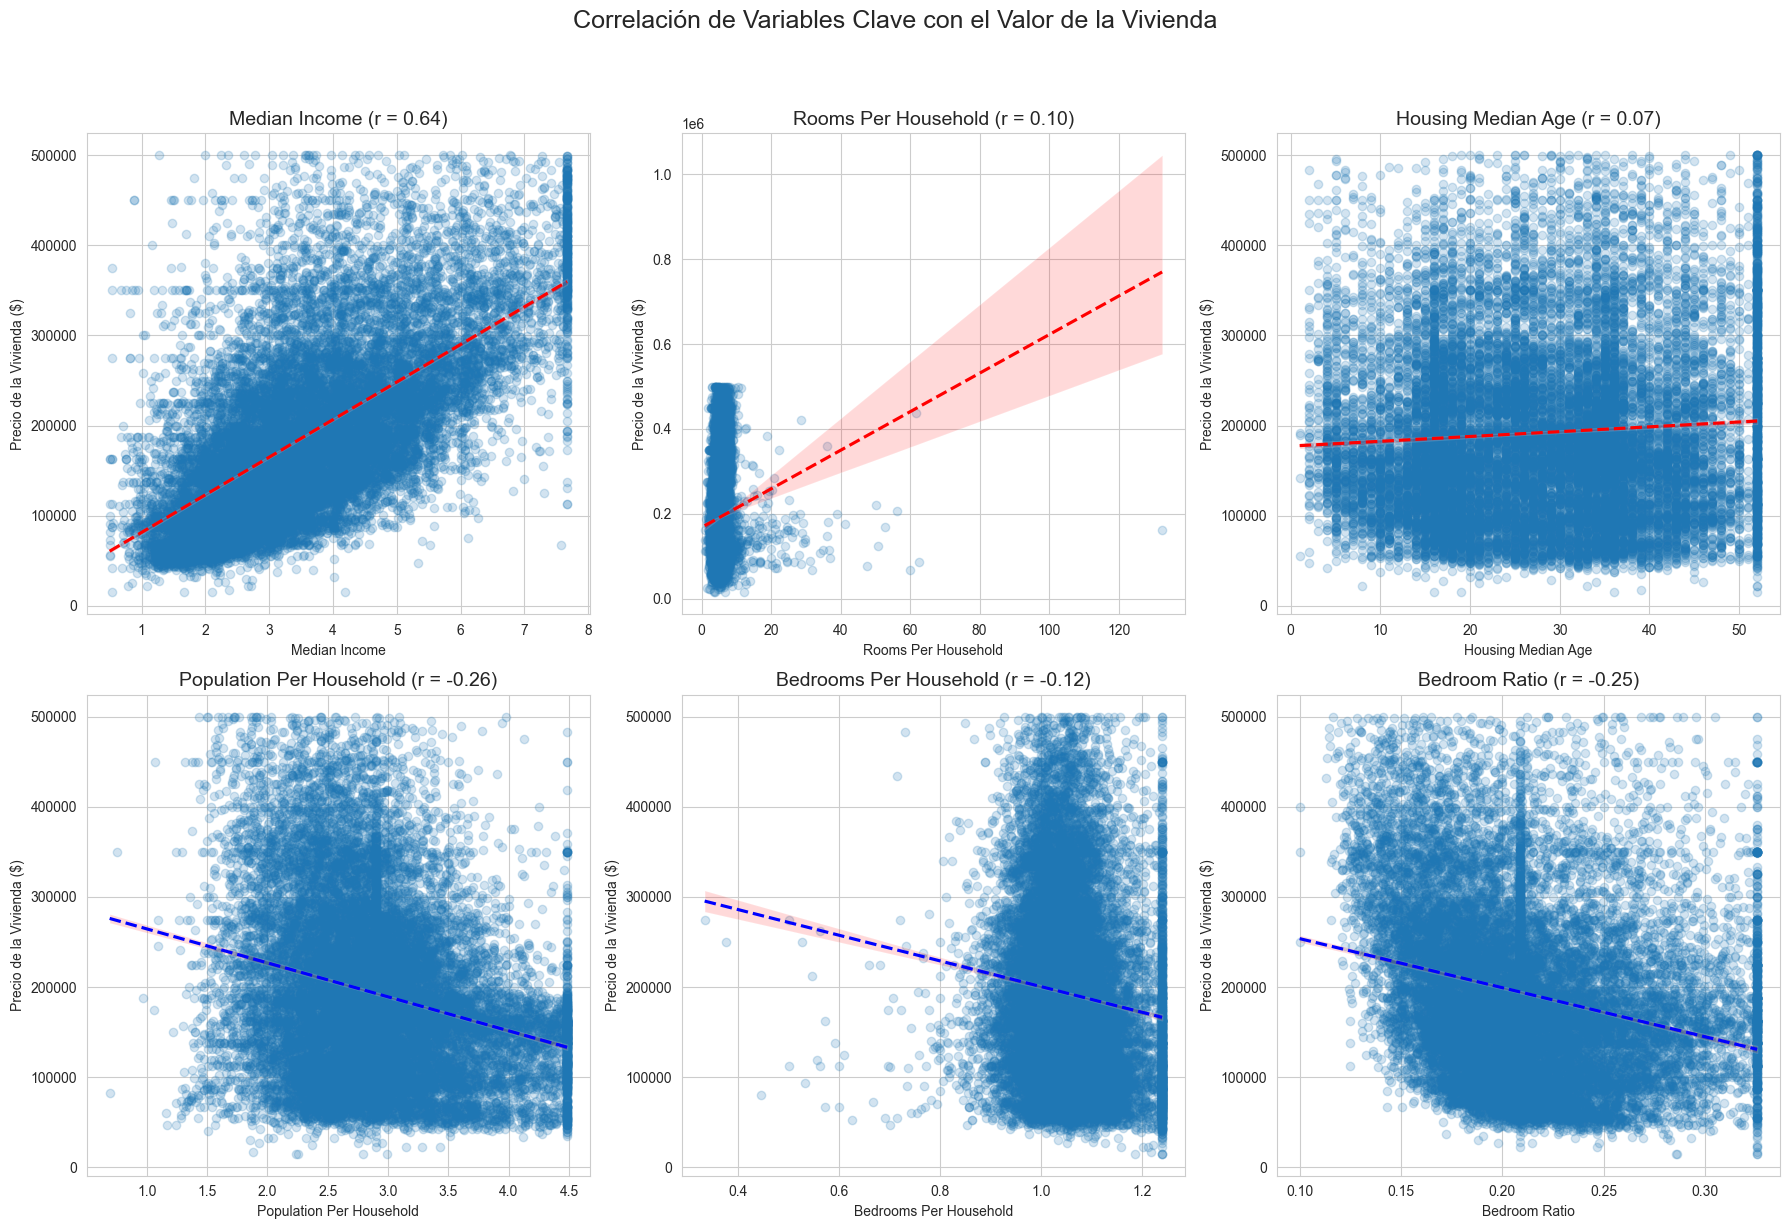

In [22]:
# Lista de variables a comparar con median_house_value
variables_a_comparar = [
    'median_income',
    'rooms_per_household',
    'housing_median_age',
    'population_per_household',
    'bedrooms_per_household',
    'bedroom_ratio'
]

# Configuración de la cuadrícula: 2 filas y 3 columnas (para 6 gráficos)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
plt.suptitle('Correlación de Variables Clave con el Valor de la Vivienda', fontsize=18, y=1.02)
sns.set_style("whitegrid")

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Bucle para generar cada gráfico con Seaborn
for i, col in enumerate(variables_a_comparar):
    # Calcular la correlación r
    r = df_final[col].corr(df_final['median_house_value'])
    
    # Usar sns.regplot (función de Seaborn) para incluir la línea de regresión
    sns.regplot(
        x=col,
        y='median_house_value',
        data=df_final,
        # Configuración de los puntos y la línea
        scatter_kws={'alpha': 0.2}, # configuracion de transparencia de los puntos
        line_kws={'color': 'red', 'linestyle': '--'}, 
        ci=95, # Configuracion Banda de confianza
        ax=axes[i] # <-- ¡Aquí es donde le decimos a Seaborn en qué subplot dibujar!
    )
    
    # Configurar el título y etiquetas usando los métodos del objeto Axis (Matplotlib)
    axes[i].set_title(f'{col.replace("_", " ").title()} (r = {r:.2f})', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Precio de la Vivienda ($)')
    
    # Cambiar el color de la línea de regresión si la correlación es negativa
    # Accedemos a la línea dibujada por regplot a través del eje.
    if r < 0:
        axes[i].lines[0].set_color('blue')
        
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajuste para el super título
plt.show()

## CREAR GRAFICO DE DISPERSION PARA UBICAR LOS PUNTOS EN UN MAPA GEOGRAFICO

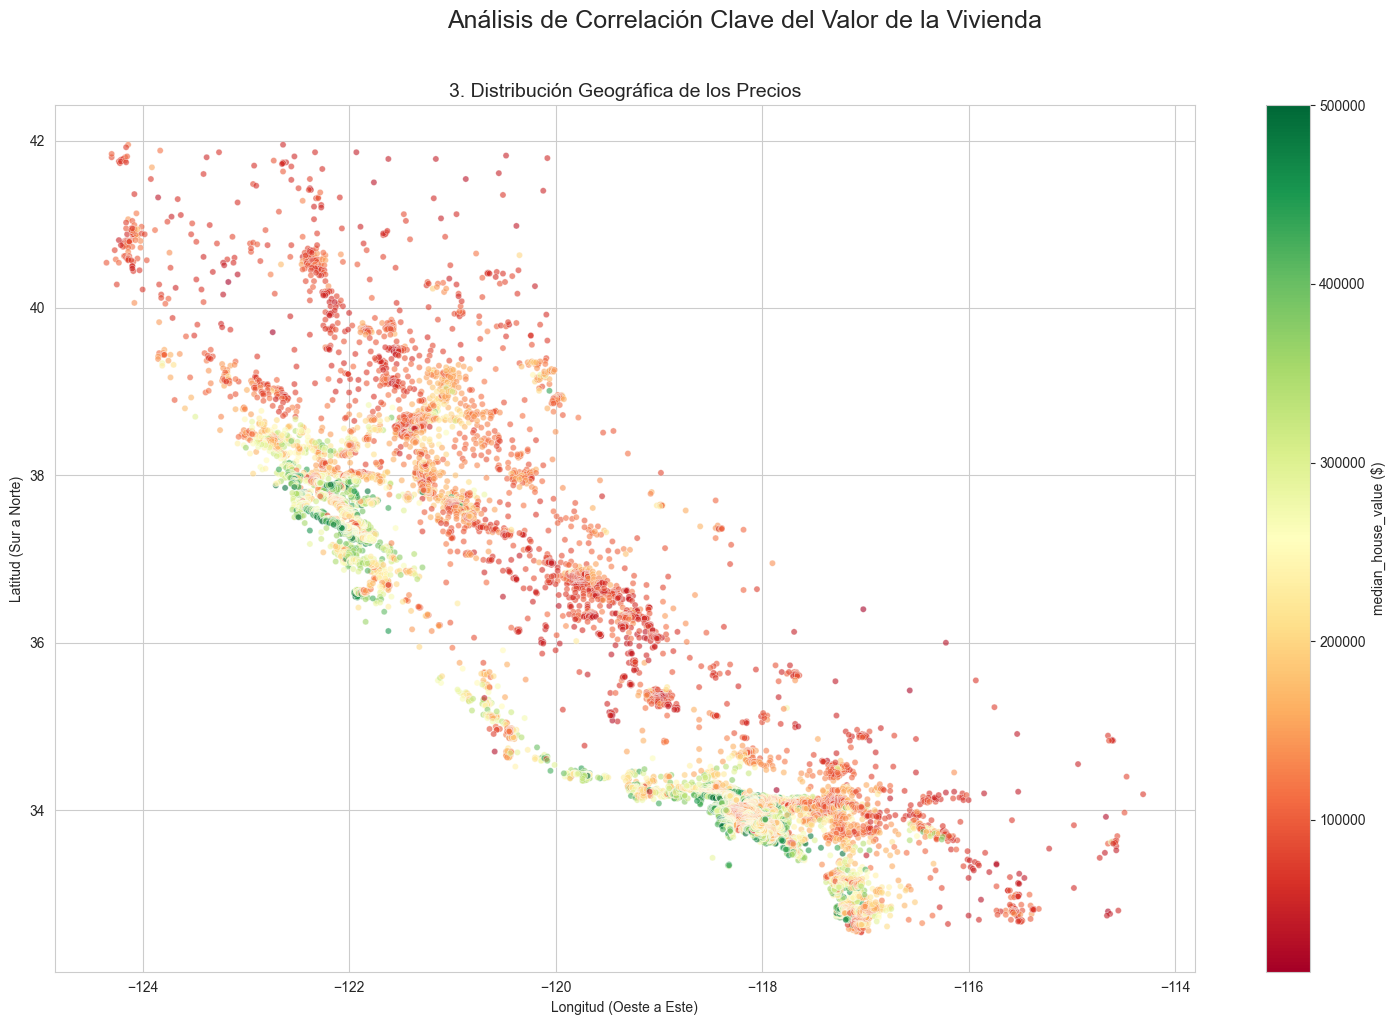

In [23]:
# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear la figura y el conjunto de ejes (axes) para la cuadrícula
# 2 filas, 2 columnas. Tamaño total de la figura 18x12.
fig, axes = plt.subplots(figsize=(15, 10))


# --- 3. Gráfico Geográfico (sns.scatterplot) ---
# Se asigna explícitamente al eje [1, 0]
scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_final,
    hue='median_house_value',
    palette='RdYlGn',
    s=20,
    alpha=0.6,
    ax=axes
)
axes.set_title('3. Distribución Geográfica de los Precios', fontsize=14)
axes.set_xlabel('Longitud (Oeste a Este)')
axes.set_ylabel('Latitud (Sur a Norte)')

# Manejo de la leyenda (colorbar) para el scatterplot geográfico
norm = plt.Normalize(df_final['median_house_value'].min(), df_final['median_house_value'].max()) # determina la escala del colorbar
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm) # Traduce la escala de numeros a colores, red, yellow y green. cm(color Map)

# para correg
# sm.set_array([])

scatter.legend_.remove() # Remueve la leyenda que genera automaticamente el grafico de dispersion
fig.colorbar(sm, ax=axes, label='median_house_value ($)')  # dibuja la barra en el grafico a partir del objeto sm(ScalarMapple)

# Ajustar el diseño
plt.suptitle('Análisis de Correlación Clave del Valor de la Vivienda', fontsize=18, y=1.02)
plt.tight_layout()   # ajusta automaticamente los parametros de la subtrama para que los elementos (titulos, subtitulos, etc) encajen perfectamente.
plt.show()

## GENERAR UN GRAFICO DE UBICACION DE LAS VIVIENDAS MAS VIEJAS. FILTRAR CON COLORES LAS VARIANTES DE PRECIOS

El umbral de edad para el 25% más viejo (Q3) es: 37.00 años
Total de bloques censales filtrados: 4536


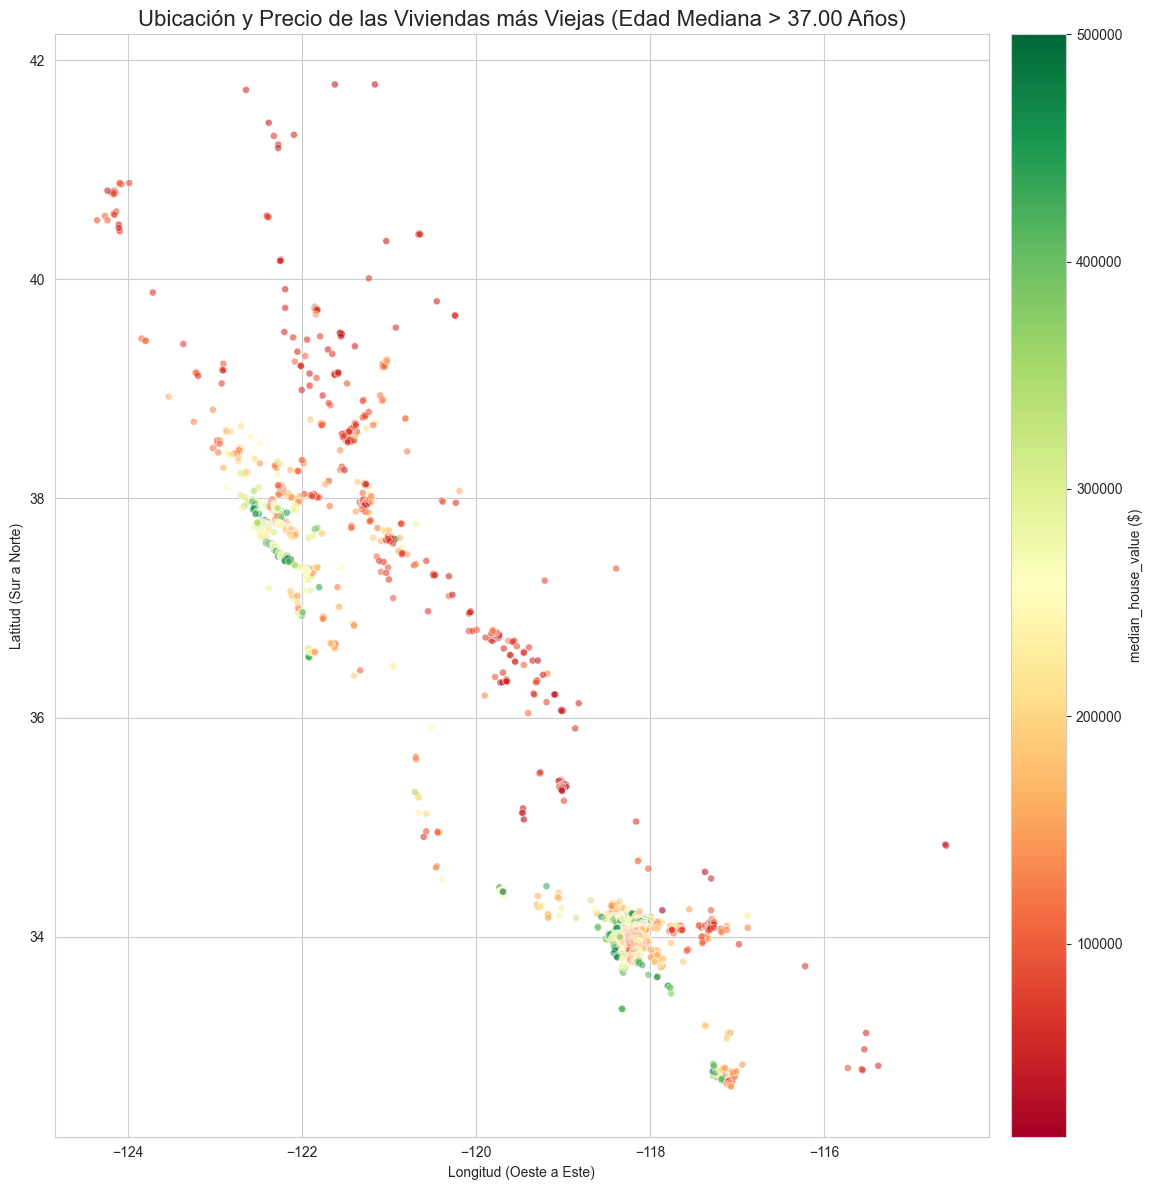

In [24]:
# --- Paso 1: Filtrar el DataFrame por el Cuartil Superior de Edad (Q3) ---

umbral_q3 = df_final['housing_median_age'].quantile(0.75) # Calcula el tercer cuartil de los datos.
df_viejas = df_final[df_final['housing_median_age'] > umbral_q3] # compara la edad de cada vivienda con el umbral calculado.
                                                                 # Genera True para las filas donde la edad es mayor que Q3, y False en caso contrario

print(f"El umbral de edad para el 25% más viejo (Q3) es: {umbral_q3:.2f} años")
print(f"Total de bloques censales filtrados: {len(df_viejas)}")

# --- Paso 2: Generar el Gráfico Estático ---
plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

# Usamos el DataFrame FILTRADO: df_viejas
scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_viejas, # <-- ¡CLAVE! Usamos el subconjunto de datos
    hue='median_house_value', # Colorea por el precio
    palette='RdYlGn',         # Esquema de color: Rojo (caro) a Verde (barato)
    s=25,                     # Tamaño del punto
    alpha=0.6,                # Transparencia
    legend=False              # Ocultar la leyenda de puntos
)

# --- Añadir la Barra de Color (Colorbar) ---
# Necesario para mostrar la escala de precios de forma estática
norm = plt.Normalize(df_viejas['median_house_value'].min(), df_viejas['median_house_value'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
#sm.set_array([]) 

plt.colorbar(sm, ax=scatter.axes, label='median_house_value ($)', pad=0.02)


# --- Títulos y Etiquetas ---
plt.title(f'Ubicación y Precio de las Viviendas más Viejas (Edad Mediana > {umbral_q3:.2f} Años)', fontsize=16)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')
plt.tight_layout()
plt.show()


## FILTRAR LAS VIVIENDAS MAS NUEVAS

In [25]:
# --- Asegurar la Columna 'es_vieja' y el umbral ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75) # Calcula la edad de la vivienda a partir del tercer cualtil
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3  # Crea una columna 'es vieja'. Valores True si es mayor a Q3 y False lo contrario.
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75) # Asegurarse de que umbral_q3 esté definido

# 1. Crear un DataFrame con las viviendas "más nuevas" o "jóvenes/medianas"
# Seleccionamos las que NO son 'es_vieja' (es decir, df_final['es_vieja'] == False)
df_nuevas = df_final[df_final['es_vieja'] == False]

print(f"El umbral de edad (Q3) es: {umbral_q3:.2f} años.")
print(f"Número de bloques censales con viviendas 'más nuevas' (<={umbral_q3:.2f} años): {len(df_nuevas)}")

El umbral de edad (Q3) es: 37.00 años.
Número de bloques censales con viviendas 'más nuevas' (<=37.00 años): 14939


## MOSTRAR EN UN MAPA GEOGRAFICO DE DISPERSION LAS VIVIENDAS MAS NUEVAS

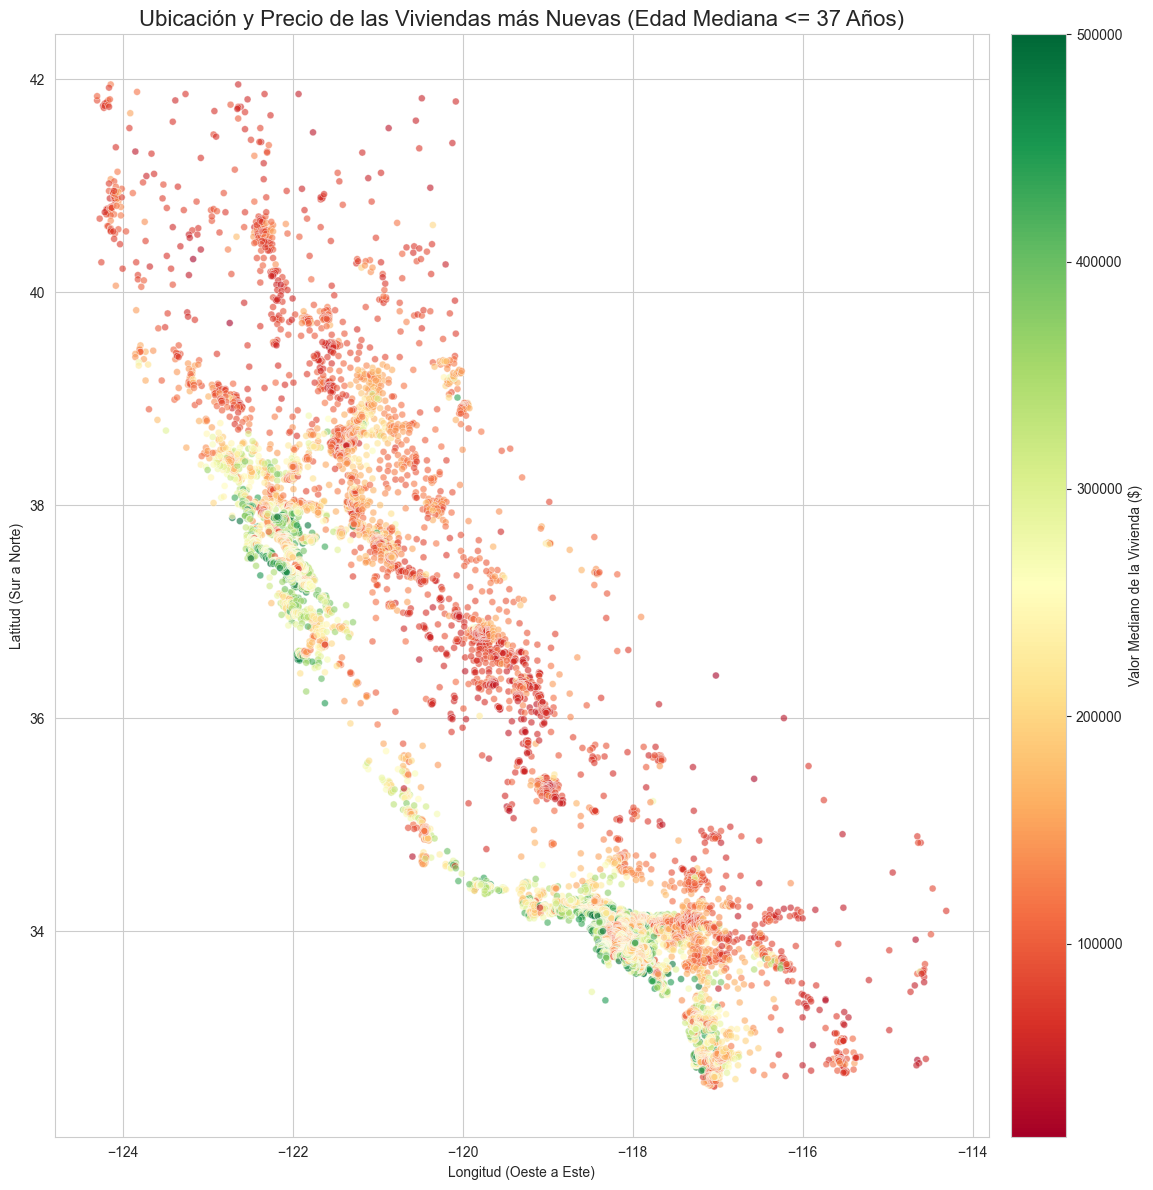

In [26]:
# --- Generar el Gráfico Estático para Viviendas Nuevas ---
plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

# Usamos el DataFrame FILTRADO: df_nuevas
scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_nuevas, # <-- ¡CLAVE! Usamos el subconjunto de datos de viviendas nuevas
    hue='median_house_value', # Colorea por el precio
    palette='RdYlGn',         # Esquema de color: Rojo (caro) a Verde (barato)
    s=25,                     # Tamaño del punto
    alpha=0.6,                # Transparencia
    legend=False              # Ocultar la leyenda de puntos
)

# --- Añadir la Barra de Color (Colorbar) ---
norm = plt.Normalize(df_nuevas['median_house_value'].min(), df_nuevas['median_house_value'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
#sm.set_array([]) 

plt.colorbar(sm, ax=scatter.axes, label='Valor Mediano de la Vivienda ($)', pad=0.02)


# --- Títulos y Etiquetas ---
plt.title(f'Ubicación y Precio de las Viviendas más Nuevas (Edad Mediana <= {umbral_q3:.0f} Años)', fontsize=16)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')
plt.tight_layout()
plt.show()

## COMPARAR CANTIDAD DE VIVIENDAS MAS NUEVAS CON VIVIENDAS MAS VIEJAS

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\2785201080.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


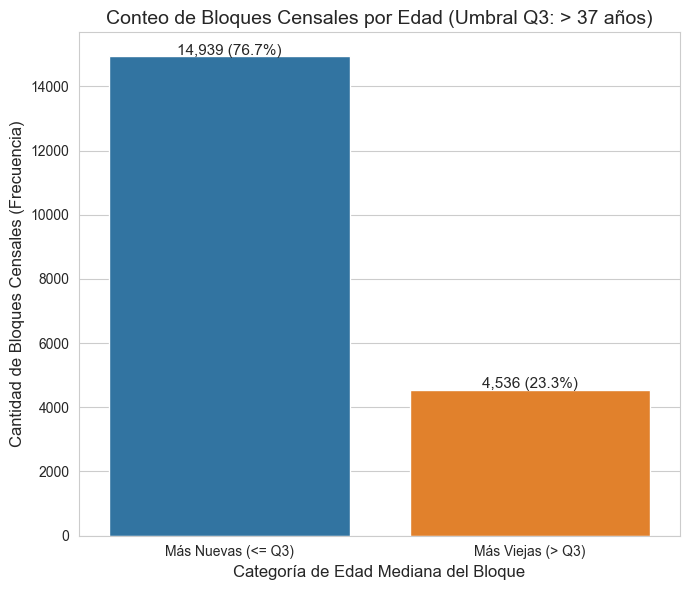


--- Conteo de Viviendas ---
Más Nuevas (<= 37 años): 14,939
Más Viejas (> 37 años): 4,536


In [27]:
# --- Preparación (Asegurando la Columna 'es_vieja') ---
# Asumimos que df_final es tu DataFrame.
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)


# --- 1. Generar el Gráfico de Conteo ---
plt.figure(figsize=(7, 6))

# Usamos sns.countplot para mostrar la cuenta de cada categoría en 'es_vieja'
ax = sns.countplot(
    x='es_vieja',
    data=df_final,
    palette=['#1f77b4', '#ff7f0e'] # Azul para "Nuevas", Naranja para "Viejas"
)

# --- 2. Configuración de Etiquetas y Títulos ---
plt.title(f'Conteo de Bloques Censales por Edad (Umbral Q3: > {umbral_q3:.0f} años)', fontsize=14)
plt.xlabel("Categoría de Edad Mediana del Bloque", fontsize=12)
plt.ylabel('Cantidad de Bloques Censales (Frecuencia)', fontsize=12)
plt.xticks([0, 1], ['Más Nuevas (<= Q3)', 'Más Viejas (> Q3)'])

# --- 3. Agregar Etiquetas de Valor a las Barras ---
total = len(df_final)

for p in ax.patches:  # lista de patches graficos del objeto ax. Cada patches es una barra del grafico.
    height = p.get_height()  # Obtine la altura del patches actual.
    # Muestra el conteo exacto y el porcentaje
    ax.text(p.get_x() + p.get_width() / 2.,  # calcula la coordenada X del texto, colocandolo en el centro horizontal de la barra.
            height + 50, # calcula la coordenada y del texto colocandolo justo por ensima de la barra.
            '{:,.0f} ({:.1f}%)'.format(height, 100 * height / total), #Muestra el conteo exacto y el porcentaje por ensima de la barra
            ha="center", fontsize=11) # centra el texto horizontalmente.

plt.tight_layout()
plt.show()

# --- 4. Imprimir la información de conteo en la consola ---
# conteo guarda una Serie de pandas que contiene dos arreglos de numpy paralelos, (True, False), (valor1, valor2)
conteo = df_final['es_vieja'].value_counts() # cuenta los valores True y False de la columna 'es vieja'
print("\n--- Conteo de Viviendas ---")
print(f"Más Nuevas (<= {umbral_q3:.0f} años): {conteo.loc[False]:,}")
print(f"Más Viejas (> {umbral_q3:.0f} años): {conteo.loc[True]:,}")

## COMPARAR LA VARIAVCION DE PRECIOS ENTRE VIVIENDAS MAS VIEJAS Y VIVIENDAS MAS NUEVAS

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\3642774641.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


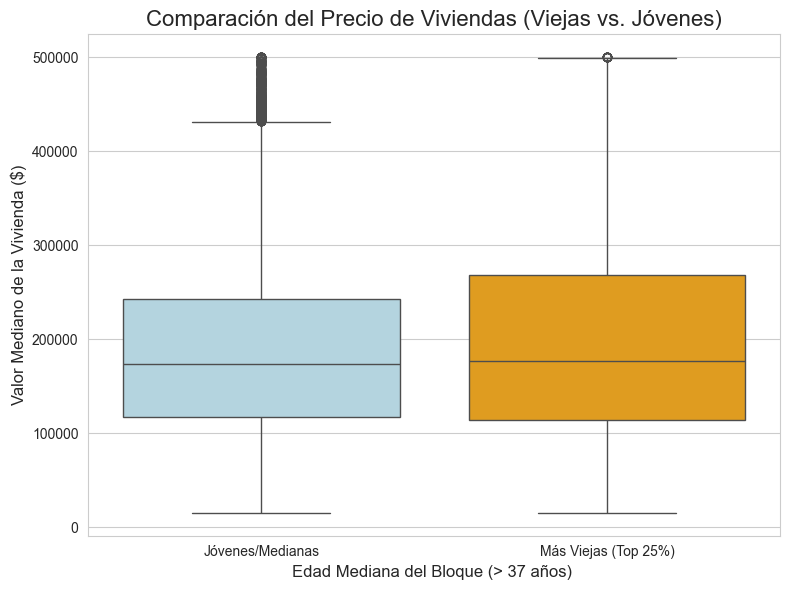


--- Mediana del Valor de la Vivienda por Grupo de Edad ---
es_vieja
False    $173,200.00
True     $176,750.00
Name: median_house_value, dtype: object


In [28]:
# 1. Definir el Umbral y Crear la Columna Categórica
# Calcular el percentil 75 (Q3) de la edad de la vivienda
umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# Crear la nueva columna categórica 'es_vieja' en df_final
# True si la edad es mayor a Q3, False si no lo es.
df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3

# 2. Generar el Box Plot para la Comparación de Precios
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='es_vieja',       # Eje X: La nueva categoría (Viejas vs. No Viejas)
    y='median_house_value', # Eje Y: El precio a comparar
    data=df_final,
    palette=['lightblue', 'orange'] # Paleta de colores para diferenciarlos
)

# Configuración del gráfico
plt.title(f'Comparación del Precio de Viviendas (Viejas vs. Jóvenes)', fontsize=16)
plt.xlabel(f"Edad Mediana del Bloque (> {umbral_q3:.0f} años) ", fontsize=12)
plt.ylabel('Valor Mediano de la Vivienda ($)', fontsize=12)
plt.xticks([0, 1], ['Jóvenes/Medianas', 'Más Viejas (Top 25%)'])
plt.tight_layout()
plt.show()

# 3. Análisis Numérico Rápido (IMPRESIÓN EN CONSOLA)
print("\n--- Mediana del Valor de la Vivienda por Grupo de Edad ---")
# Agrupa por 'es_vieja', calcula la mediana del precio y la formatea
comparacion_precios = df_final.groupby('es_vieja')['median_house_value'].median().map('${:,.2f}'.format)
print(comparacion_precios)

## COMPARACION DE DISTRIBUCION DIMENSIONAL ENTRE VIVIENDAS VIEJAS Y NUEVAS
### Objetivo: determinar si las viviendas mas viejas son, en promedio, mas grandes o mas pequenas, y si estan mas o menos densamente pobladas que las viviendas mas nuevas.

     MEDIANA DE DIMENSIONES POR EDAD DEL BLOQUE CENSAL (> Q3)      

--- Mediana de Rooms Per Household:
  Jóvenes/Medianas (False): 5.22
  Más Viejas (True):        4.81

--- Mediana de Population Per Household:
  Jóvenes/Medianas (False): 2.90
  Más Viejas (True):        2.70


C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\2485300280.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\2485300280.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


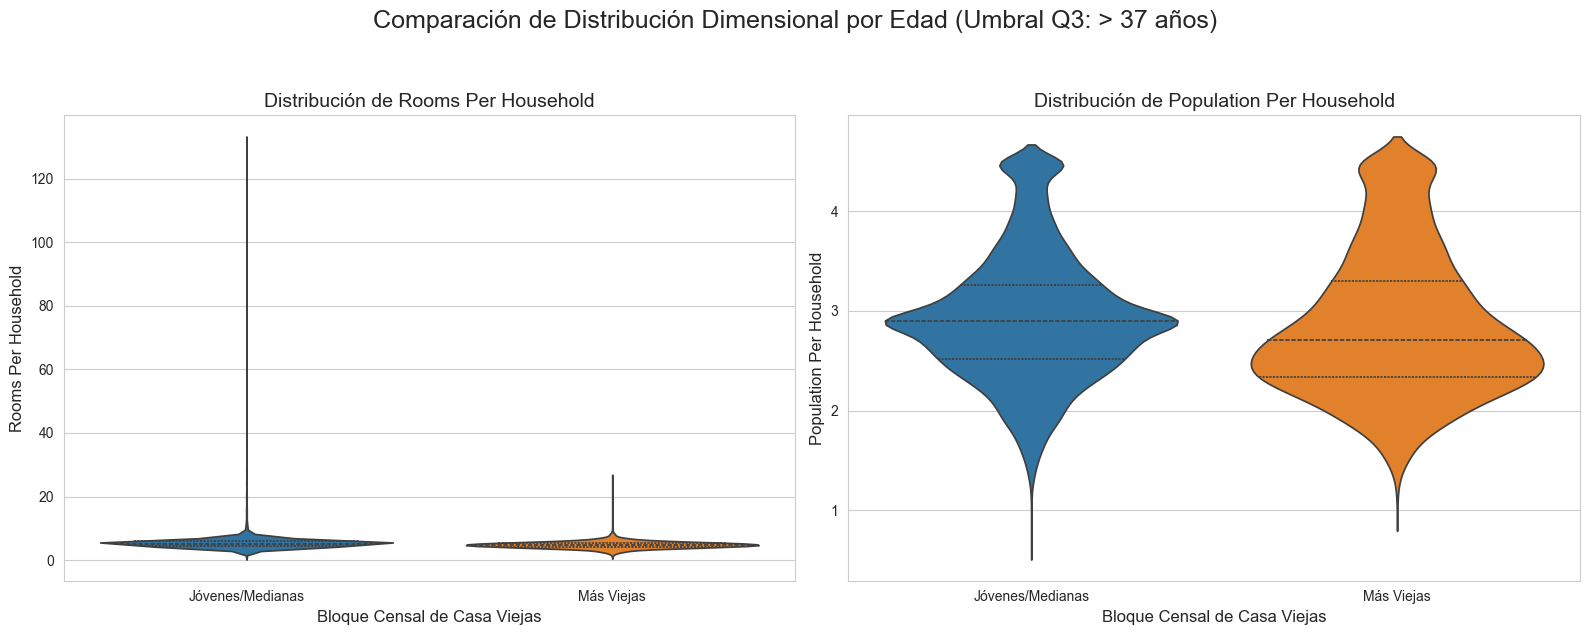

In [29]:
# --- Preparación (Asegurando la Columna 'es_vieja') ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# Lista de variables dimensionales a comparar
variables_dimension = [
    'rooms_per_household',      # Tamaño medio de la casa
    'population_per_household'  # Densidad de población
]

# --- 1. CÁLCULO E IMPRESIÓN DE LAS MEDIANAS EN CONSOLA ---
print("===================================================================")
print("     MEDIANA DE DIMENSIONES POR EDAD DEL BLOQUE CENSAL (> Q3)      ")
print("===================================================================")

# Bucle de agrupacion y calculo
for col in variables_dimension:
    # Agrupamos por 'es_vieja' True(viejas) y False(nuevas) y calculamos la mediana para cada variable
    # mediana almacena una Series de pandas con dos resultados, la mediana para True(viejas) y la mediana para False(nuevas)
    medianas = df_final.groupby('es_vieja')[col].median().round(2)
    
    # Imprimimos el resultado formateado
    print(f"\n--- Mediana de {col.replace('_', ' ').title()}:")
    print(f"  Jóvenes/Medianas (False): {medianas.loc[False]:.2f}")
    print(f"  Más Viejas (True):        {medianas.loc[True]:.2f}")


# --- 2. GENERACIÓN DE LOS VIOLIN PLOTS ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.suptitle(f'Comparación de Distribución Dimensional por Edad (Umbral Q3: > {umbral_q3:.0f} años)', fontsize=18, y=1.05)

palette = ['#1f77b4', '#ff7f0e'] # Colores estándar

# Buclie de iteracion
# i es el indice(poision del grafico en la figura)
# col es el nombre de la columna actual a graficar
for i, col in enumerate(variables_dimension):
    sns.violinplot(
        x='es_vieja',
        y=col,
        data=df_final,
        palette=palette, # utilizar la paleta de colores almacenada en la variable pallete
        inner='quartile', # dibuja lineas dentro del cuerpo del violin para representar los cuartiles(Q1, Q2, Q3)
        ax=axes[i]
    )
    
    # Configuración de Etiquetas
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel("Bloque Censal de Casa Viejas", fontsize=12)
    axes[i].set_ylabel(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Jóvenes/Medianas', 'Más Viejas'])

plt.tight_layout()
plt.show()

### **1. Para la distribucion de Rooms per Household:** 
* **Viviendas jovenes/medianas (izquierda):**
     * **Distribucion:** Muestra una concentracion principal(el cuerpo ancho del violin) al rededor de un numero bajo de habitaciones por hogar(cerca de 5 a 6).
     * **Outliers extremos:** presenta una cola de densidad muy larga y delgada que se extiende hasta valores extremadamente altos(hasta aprox. 130 en el eje y).  Esto indica contiene los outliers de mansiones o propiedades de lujo con un numro excepcionalmente alto de habitaciones por unidad.
     * **Conclusion:** Este grupo es mucho mas heterogeneo en terminos de tamano, incluyendo tanto la vivienda pormedio como las propiedades mas grandes y caras del mecado.

* **Viviendas mas viejas (derecha):**
     * **Distribucion:** El violin tiene una forma similar de concentracion principal (alrededor de 5 a 6 habitacion por hogar).
     * **Outliers extremos:** su cola se extiende a valores maximos mucho mas modestos (cerca de 28 en el eje y)
     * **Conclusion:** el inventario mas antiguo es mas homogeneo y predecible. Carece de los outliers de gran tamano que se encuetran en el otro grupo.

**Para la distribucion Population per Household:** el grupo de viviendas mas viejas tiende a tener una poblacion promedio por unidad de vivienda ligeramente mas baja que el grupo de viviendas mas jovenes y edad media.
Esto podria implicar que:
1. Las casas mas viejas son ligeramente mas pequenas o menos adecuadas para familias grandes.

Abmos grupos tienen la misma variabilidad (la longitud del violin son similares) pero su centro de masa(la mediana) esta desplazado.

### CANTIDAD DE VIVIENDAS NUEVAS Y VIEJAS QUE ESTAN CERCA DEL OCEANO, CERCA DE LA BAHIA Y A UNA HORA DEL OCEANO
### Objetivo: aislar las viviendas viejas y nuevas que esten cerca del agua para calcular sus precios mediana o para realizar analisis espesificos.

In [30]:
# --- 1. Asegurar la Columna 'es_vieja' (si aún no existe) ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# --- 2. Definir el Filtro de Proximidad al Agua (3 Categorías) ---
# Crea una Serie de panda, con valores booleanos, True o False donde True se asigna a cualquier distrito clasicicado como (<1H OCEAN, NEAR BAY, NEAR OCEAN), 
# y False se asigna a los distritos clasificados como INLAND o ISLAND.
filtro_agua_ampliado = (
    (df_final['ocean_proximity'] == '<1H OCEAN') |
    (df_final['ocean_proximity'] == 'NEAR BAY') |
    (df_final['ocean_proximity'] == 'NEAR OCEAN')
)

# --- 3. Crear los dos subconjuntos filtrados ---

# GRUPO A: Crea un dataframe de viviendas Viejas y Cerca del Agua (3 categorías)
# df_viejas_agua_ampliado guarda un nuevo dataframe con los distritos de unidades de viviendas mas viejas que esta cerca del agua
df_viejas_agua_ampliado = df_final[filtro_agua_ampliado & (df_final['es_vieja'] == True)]

# GRUPO B: Crea un dataframe de viviendas Nuevas y Cerca del Agua (3 categorías)
# df_nuevas_agua_ampliado guarda un nuevo dataframe con los distritos de unidades de viviendas mas nuevas que esta cerca del agua
df_nuevas_agua_ampliado = df_final[filtro_agua_ampliado & (df_final['es_vieja'] == False)]

print("===================================================================")
print(f"ANÁLISIS COMBINADO (NEAR OCEAN, NEAR BAY, <1H OCEAN y Edad)")
print(f"Total Viviendas Viejas/Agua (3 Cat.): {len(df_viejas_agua_ampliado):,}")
print(f"Total Viviendas Nuevas/Agua (3 Cat.): {len(df_nuevas_agua_ampliado):,}")
print("===================================================================")

ANÁLISIS COMBINADO (NEAR OCEAN, NEAR BAY, <1H OCEAN y Edad)
Total Viviendas Viejas/Agua (3 Cat.): 3,596
Total Viviendas Nuevas/Agua (3 Cat.): 9,405


## MEDIANA DE PRECIOS ENTRE VIVIENDAS VIEJAS Y NUEVAS CERCA DEL AGUA

In [31]:
# Calcular la mediana del precio para cada grupo
mediana_viejas_agua_ampliada = df_viejas_agua_ampliado['median_house_value'].median()
mediana_nuevas_agua_ampliada = df_nuevas_agua_ampliado['median_house_value'].median()

# Calcular la diferencia
diferencia_ampliada = mediana_viejas_agua_ampliada - mediana_nuevas_agua_ampliada

print("\n--- COMPARACIÓN DE PRECIOS MEDIANOS (3 CATEGORÍAS DE AGUA) ---")
print(f"1. Precio Mediano (Viejas/Agua):   ${mediana_viejas_agua_ampliada:,.2f}")
print(f"2. Precio Mediano (Nuevas/Agua):   ${mediana_nuevas_agua_ampliada:,.2f}")
print("----------------------------------------------------------------")
print(f"Diferencia (1 - 2):                 ${diferencia_ampliada:,.2f}")


--- COMPARACIÓN DE PRECIOS MEDIANOS (3 CATEGORÍAS DE AGUA) ---
1. Precio Mediano (Viejas/Agua):   $200,700.00
2. Precio Mediano (Nuevas/Agua):   $213,200.00
----------------------------------------------------------------
Diferencia (1 - 2):                 $-12,500.00


Este resultado revela que en el mercado inmobiliario, las ubicaciones premiun (cerca del agua) estan valorando mas las comodidades, la modernidad y la construccion mas reciente que el valor historico. Parece ser mas bien un factor de mercado inmobiliario. El mercado costero esta dispuesto a pagar mas por el inventario mas moderno y de edad media.

## UBICACION GEOGRAFICA DE VIVIENDAS NUEVAS Y VIEJAS CERCA DEL AGUA

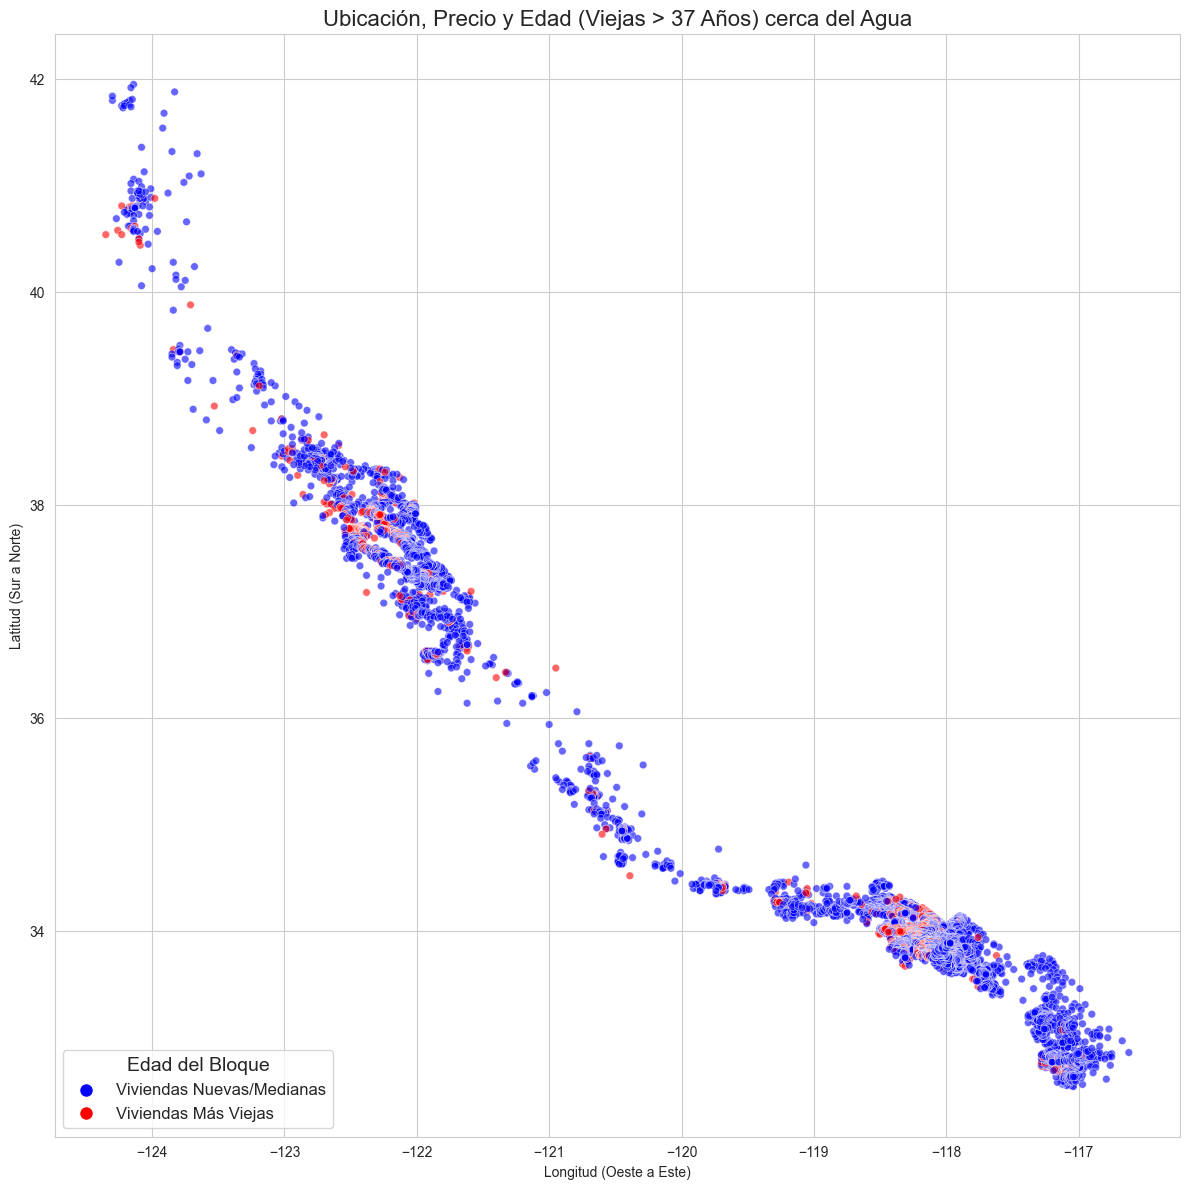

In [32]:
from matplotlib.lines import Line2D # Necesario para crear handles manuales

if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# Filtro 
filtro_agua_ampliado = ((df_final['ocean_proximity'] == '<1H OCEAN') | (df_final['ocean_proximity'] == 'NEAR BAY') | (df_final['ocean_proximity'] == 'NEAR OCEAN'))
df_comparacion_agua = df_final[filtro_agua_ampliado].copy()
# ----------------------------------------------------------------------


plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_comparacion_agua, 
    hue='es_vieja', 
    size='median_house_value', 
    sizes=(30, 30), 
    palette={True: 'red', False: 'blue'},
    alpha=0.6,
)

# --- CORRECCIÓN DEFINITIVA DE LA LEYENDA (Creación Manual) ---

# 1. Definir los handles y labels
legend_handles = [
    # Handle para Viviendas Nuevas/Medianas (Color Azul)
    Line2D([0], [0], marker='o', color='w', label='Viviendas Nuevas/Medianas',
           markerfacecolor='blue', markersize=10),
    # Handle para Viviendas Más Viejas (Color Rojo)
    Line2D([0], [0], marker='o', color='w', label='Viviendas Más Viejas',
           markerfacecolor='red', markersize=10)
]

# 2. Reemplazar la leyenda del eje con los handles manuales
plt.legend(
    handles=legend_handles, 
    title="Edad del Bloque", 
    loc='lower left', 
    fontsize=12, 
    title_fontsize=14
)

# --- Títulos y Etiquetas ---
plt.title(f'Ubicación, Precio y Edad (Viejas > {umbral_q3:.0f} Años) cerca del Agua', fontsize=16)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')

plt.tight_layout()
plt.show()

### Preparacion de datos para grafico de , distribucion de viviendas nuevas y viejas segun su ubicacion
### Objetivo: permitir ver donde coexisten o se excluyen los diferentes grupos y poder contextualizar las diferencias de precios.

In [33]:
# 1. Asegurar la columna 'es_vieja' y el umbral Q3
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# 2. Crear la columna categórica combinada
# Realiza una transformacion de datos en la columna 'ocean_proximity' para simplificar en dos categorias, 'AGUA' o 'INLAND'
df_final['proximidad_agua'] = df_final['ocean_proximity'].apply(
    lambda x: 'INLAND' if x == 'INLAND' else 'AGUA'  # toma el valor de cada celda(x) y aplica la condicion para devorlver el nuevo valor (INLAND, AUGA)
)

# Combinar Edad y Proximidad
df_final['categoria_combinada'] = np.where(
    (df_final['es_vieja'] == True) & (df_final['proximidad_agua'] == 'AGUA'), 'Vieja_Agua',
    np.where(
        (df_final['es_vieja'] == False) & (df_final['proximidad_agua'] == 'AGUA'), 'Nueva_Agua',
        np.where(
            (df_final['es_vieja'] == True) & (df_final['proximidad_agua'] == 'INLAND'), 'Vieja_Tierra',
            'Nueva_Tierra' # El resto son Nuevas/Tierra
        )
    )
)

# 3. Crear el DataFrame final para el gráfico (excluimos 'ISLAND')
df_final_grafico = df_final[df_final['ocean_proximity'] != 'ISLAND'].copy()

## GRAFICO DE DISTRIBUCION DE VIVIENDAS VIEJAS Y NUEVAS SEGUN SU UBICACION

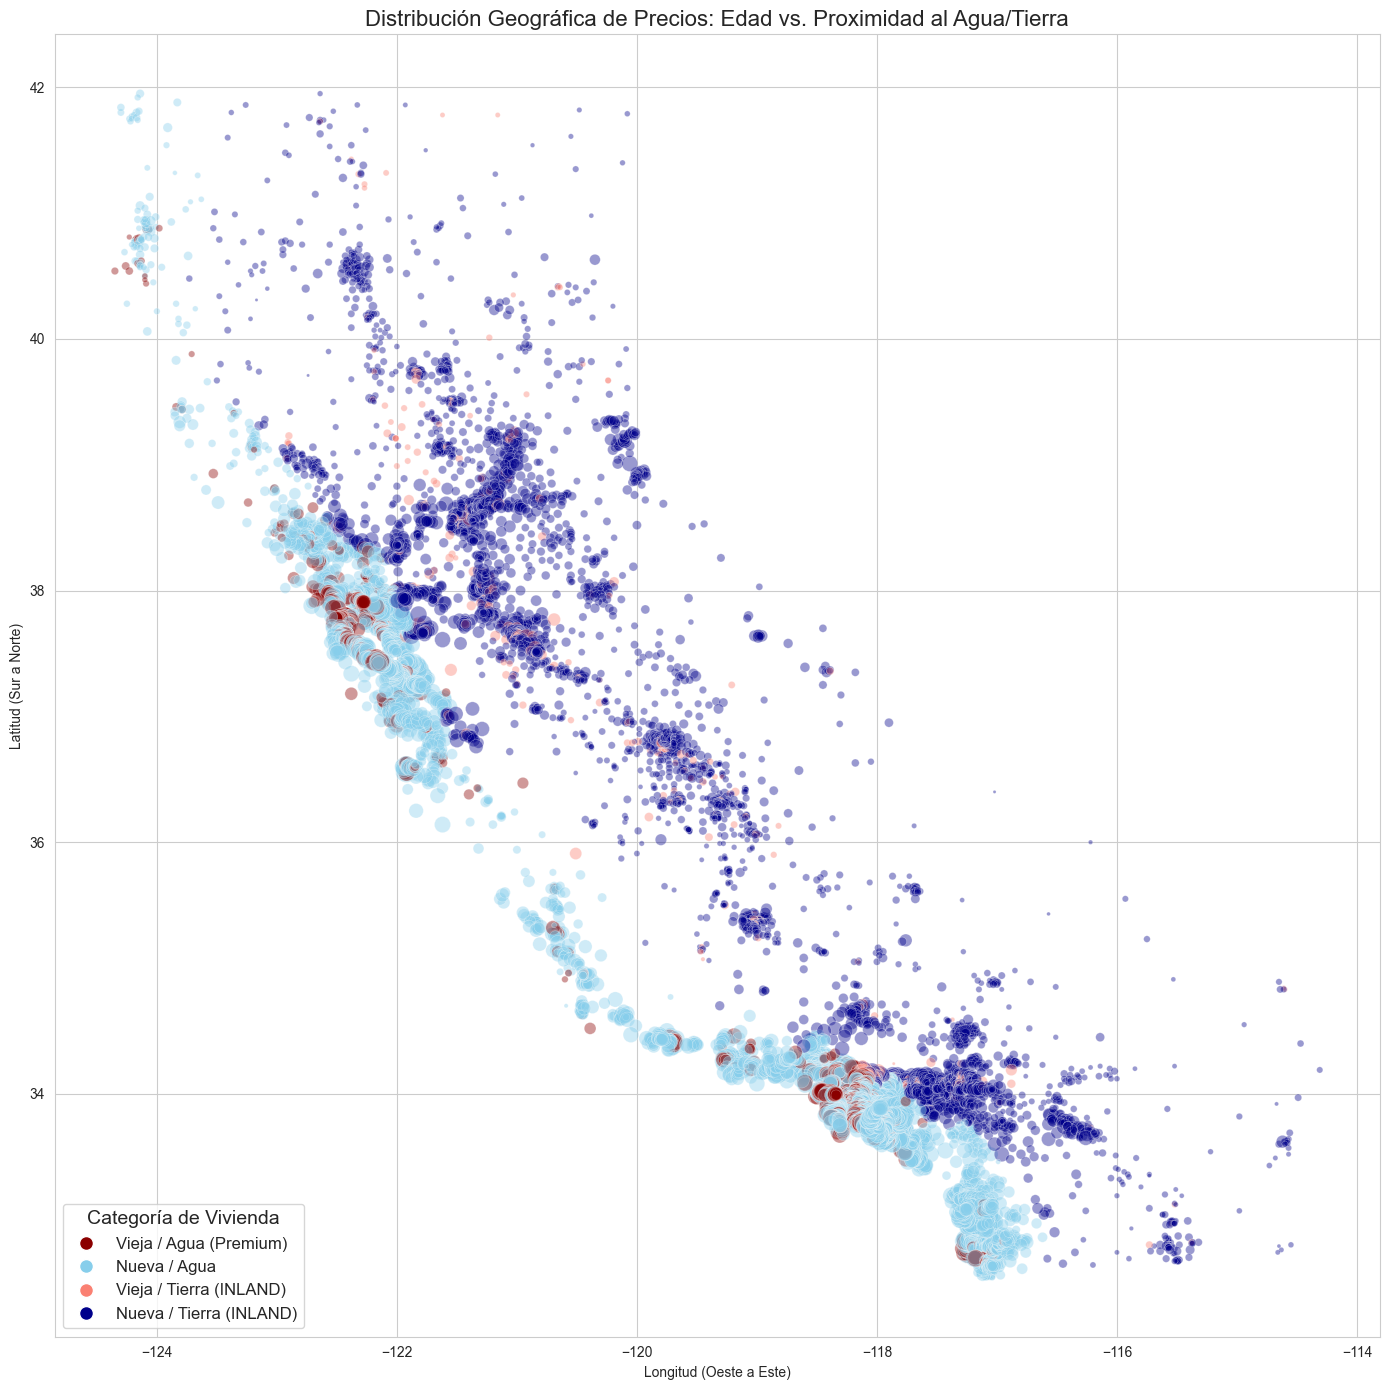

In [34]:
from matplotlib.lines import Line2D

plt.figure(figsize=(14, 14))
sns.set_style("whitegrid")

# Definición de la paleta de 4 colores:
# Queremos un contraste claro entre Agua (Viejas/Nuevas) y Tierra (Viejas/Nuevas)
PALETA_4_COLORES = {
    'Vieja_Agua': 'darkred',   # Viejas y Caras (Agua)
    'Nueva_Agua': 'skyblue',   # Nuevas y Caras (Agua)
    'Vieja_Tierra': 'salmon',  # Viejas y Baratas (Tierra)
    'Nueva_Tierra': 'darkblue' # Nuevas y Baratas (Tierra)
}

scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_final_grafico, 
    hue='categoria_combinada', # ¡CLAVE! Usa la columna combinada
    size='median_house_value', 
    sizes=(5, 150), 
    palette=PALETA_4_COLORES,
    alpha=0.4,
)

# --- Creación Manual de la Leyenda de Color (4 elementos) ---
# Lista de elementos de leyendas personalizadas utilizando la clase Line2D de matplotlib
# Line2D se utiliza para dibujar lineas y marcadores simples.
# Al crear una instancia de Line2D sin una linea real, solo se visualiza el marcador.
# Cada elemento de la lista define la apariencia de una de las cuatro categorias combinadas.
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Vieja / Agua (Premium)', markerfacecolor='darkred', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nueva / Agua', markerfacecolor='skyblue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Vieja / Tierra (INLAND)', markerfacecolor='salmon', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Nueva / Tierra (INLAND)', markerfacecolor='darkblue', markersize=10),
]

# Reemplazar la leyenda del eje con los handles manuales
plt.legend(
    handles=legend_handles, 
    title="Categoría de Vivienda", 
    loc='lower left', 
    fontsize=12, 
    title_fontsize=14
)

# --- Títulos y Etiquetas ---
plt.title('Distribución Geográfica de Precios: Edad vs. Proximidad al Agua/Tierra', fontsize=16)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')

plt.tight_layout()
plt.show()

## CONTEO CENSAL DE VIVIENDAS VIEJAS SEGUN SU UBICACION

In [35]:
# --- Preparación (Asegurando la Columna 'es_vieja') ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)


# --- CÁLCULO DEL CONTEO AGRUPADO ---
# 1. Agrupar por ocean_proximity y es_vieja, y contar los registros
# Esta linea de codigo realiza un contedo de frecuencia de distritos al agruparlos segun dos variables categoricas simultaneamente.
# Divide en multiples subgrupos por cada combinacion unica de categorias de ubicacion y edad.
# Resultado es un objeto MultiIndex.
conteo_agrupado = df_final.groupby(['ocean_proximity', 'es_vieja']).size() # size, hace un conteo de cada subgrupo

# 2. Filtrar solo las viviendas 'Viejas' (es_vieja=True)
# Esto es una serie de pandas que contiene el conteo de viejas por cada proximidad
conteo_viejas_por_proximidad = conteo_agrupado.xs(True, level='es_vieja', drop_level=False)


# --- IMPRESIÓN EN CONSOLA ---
print("===================================================================")
print(f"       CONTEO DE BLOQUES CENSALES 'MÁS VIEJOS' (> {umbral_q3:.0f} años)       ")
print("===================================================================")

# Obtenemos los índices (las categorías de proximidad)
categorias = ['NEAR OCEAN', 'NEAR BAY', 'INLAND', '<1H OCEAN', 'ISLAND']

for categoria in categorias:
    # Intentamos obtener el conteo, si no existe (ej. ISLAND tiene 0 viejas), se imprime 0
    conteo = conteo_viejas_por_proximidad.get((categoria, True), 0)
    print(f"Viejas en {categoria:<10}: {conteo:>7,}")

print("-------------------------------------------------------------------")
total_viejas = conteo_viejas_por_proximidad.sum()
print(f"TOTAL DE BLOQUES VIEJOS: {total_viejas:>10,}")
print("===================================================================")

       CONTEO DE BLOQUES CENSALES 'MÁS VIEJOS' (> 37 años)       
Viejas en NEAR OCEAN:     602
Viejas en NEAR BAY  :   1,067
Viejas en INLAND    :     937
Viejas en <1H OCEAN :   1,927
Viejas en ISLAND    :       3
-------------------------------------------------------------------
TOTAL DE BLOQUES VIEJOS:      4,536


## CONTEO DE VIVIENDAS MAS NUEVAS SEGUN SU UBICACION

In [36]:
# --- Preparación (Asegurando la Columna 'es_vieja') ---
# Asumimos que df_final es tu DataFrame y que el umbral Q3 ya se ha calculado.
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)


# --- CÁLCULO DEL CONTEO AGRUPADO ---

# 1. Agrupar por ocean_proximity y es_vieja, y contar los registros
conteo_agrupado = df_final.groupby(['ocean_proximity', 'es_vieja']).size()

# 2. Filtrar solo las viviendas 'Nuevas/Jóvenes' (es_vieja=False)
# Usamos .xs() para obtener un corte solo donde la segunda clave ('es_vieja') es False
conteo_nuevas_por_proximidad = conteo_agrupado.xs(False, level='es_vieja', drop_level=False)


# --- IMPRESIÓN EN CONSOLA ---
print("===================================================================")
print(f"     CONTEO DE BLOQUES CENSALES 'MÁS NUEVOS' (<= {umbral_q3:.0f} años)      ")
print("===================================================================")

# Obtenemos las categorías de proximidad
categorias = ['NEAR OCEAN', 'NEAR BAY', 'INLAND', '<1H OCEAN', 'ISLAND']

for categoria in categorias:
    # Intentamos obtener el conteo, si no existe, se imprime 0
    # Nota: Usamos (categoria, False) como tupla de clave
    conteo = conteo_nuevas_por_proximidad.get((categoria, False), 0)
    print(f"Nuevas en {categoria:<10}: {conteo:>7,}")

print("-------------------------------------------------------------------")
total_nuevas = conteo_nuevas_por_proximidad.sum()
print(f"TOTAL DE BLOQUES NUEVOS: {total_nuevas:>10,}")
print("===================================================================")

     CONTEO DE BLOQUES CENSALES 'MÁS NUEVOS' (<= 37 años)      
Nuevas en NEAR OCEAN:   1,817
Nuevas en NEAR BAY  :   1,010
Nuevas en INLAND    :   5,532
Nuevas en <1H OCEAN :   6,578
Nuevas en ISLAND    :       2
-------------------------------------------------------------------
TOTAL DE BLOQUES NUEVOS:     14,939


## COMPARACION DE PRECIOS DE VIVIENDS NUEVAS SEGUN SU UBICACION CERCA DEL AGUA E INLAND

In [37]:
# --- 1. Asegurar la Columna 'es_vieja' y el umbral Q3 (ya definidos) ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# --- 2. Filtrar solo las viviendas 'Nuevas/Jóvenes' ---
df_nuevas = df_final[df_final['es_vieja'] == False].copy()

# --- 3. Crear la nueva categoría de UBICACIÓN BINARIA en el DataFrame filtrado ---
# Sintaxis np.where(condicion, valor_si_es_verdadero, valor_si_es_falso)
df_nuevas['ubicacion_agua_vs_tierra'] = np.where(
    df_nuevas['ocean_proximity'] == 'INLAND', 
    'INLAND', 
    'AGUA' # Agrupa NEAR OCEAN, NEAR BAY, <1H OCEAN, ISLAND
)

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\3481231998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


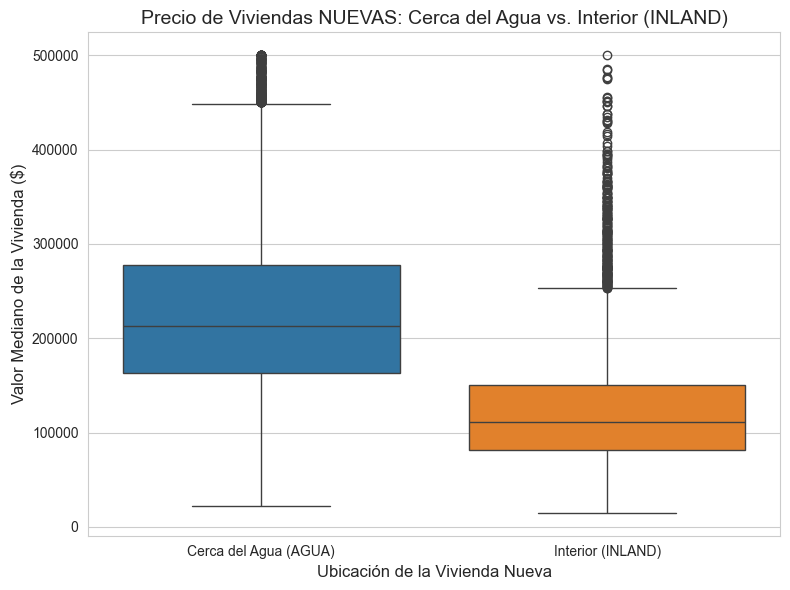


--- Mediana del Precio de Viviendas NUEVAS por Ubicación ---
ubicacion_agua_vs_tierra
AGUA      $213,200.00
INLAND    $111,400.00
Name: median_house_value, dtype: object


In [38]:
# 1. Generar el Box Plot para la Comparación de Precios
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='ubicacion_agua_vs_tierra', # Eje X: AGUA vs. INLAND
    y='median_house_value',       # Eje Y: El precio a comparar
    data=df_nuevas,               # Usamos solo las viviendas nuevas
    palette=['#1f77b4', '#ff7f0e'] 
)

# Configuración del gráfico
plt.title(f'Precio de Viviendas NUEVAS: Cerca del Agua vs. Interior (INLAND)', fontsize=14)
plt.xlabel("Ubicación de la Vivienda Nueva", fontsize=12)
plt.ylabel('Valor Mediano de la Vivienda ($)', fontsize=12)
plt.xticks([0, 1], ['Cerca del Agua (AGUA)', 'Interior (INLAND)'])
plt.tight_layout()
plt.show()

# 2. Análisis Numérico (IMPRESIÓN EN CONSOLA)
print("\n--- Mediana del Precio de Viviendas NUEVAS por Ubicación ---")
comparacion_precios = df_nuevas.groupby('ubicacion_agua_vs_tierra')['median_house_value'].median().map('${:,.2f}'.format)
print(comparacion_precios)

## COMPARACION PRECIOS DE VIVIENDAS VIEJAS SEGUN SU UBUCACION CERCA DEL AGUA E INLAND

In [39]:
# --- 1. Asegurar la Columna 'es_vieja' y el umbral Q3 (ya definidos) ---
if 'es_vieja' not in df_final.columns:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)
    df_final['es_vieja'] = df_final['housing_median_age'] > umbral_q3
else:
    umbral_q3 = df_final['housing_median_age'].quantile(0.75)

# --- 2. Filtrar solo las viviendas 'Viejas' ---
df_viejas = df_final[df_final['es_vieja'] == True].copy()

# --- 3. Crear la nueva categoría de UBICACIÓN BINARIA en el DataFrame filtrado ---
df_viejas['ubicacion_agua_vs_tierra'] = np.where(
    df_viejas['ocean_proximity'] == 'INLAND', 
    'INLAND', 
    'AGUA' # Agrupa NEAR OCEAN, NEAR BAY, <1H OCEAN, ISLAND
)

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\2658859046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


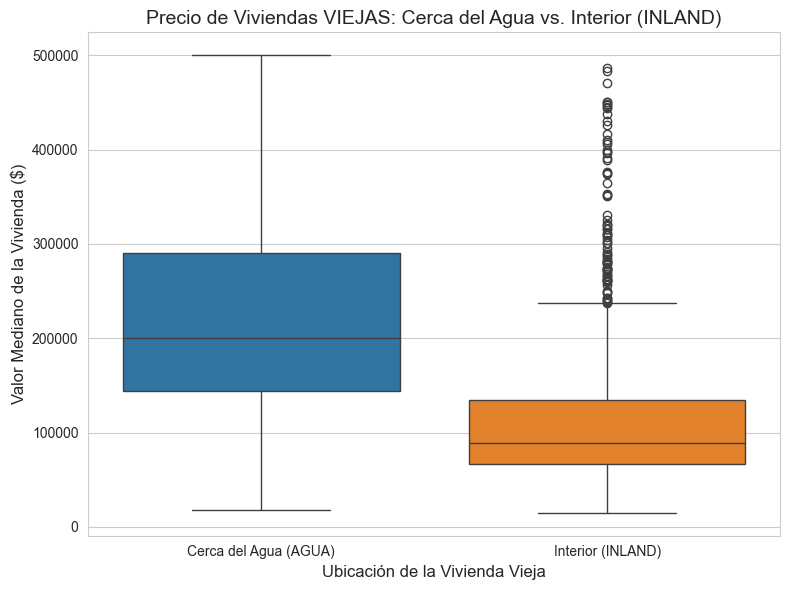


--- Mediana del Precio de Viviendas VIEJAS por Ubicación ---
ubicacion_agua_vs_tierra
AGUA      $200,800.00
INLAND     $88,500.00
Name: median_house_value, dtype: object


In [40]:
# 1. Generar el Box Plot para la Comparación de Precios
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='ubicacion_agua_vs_tierra', # Eje X: AGUA vs. INLAND
    y='median_house_value',       # Eje Y: El precio a comparar
    data=df_viejas,               # Usamos solo las viviendas VIEJAS
    palette=['#1f77b4', '#ff7f0e'] 
)

# Configuración del gráfico
plt.title(f'Precio de Viviendas VIEJAS: Cerca del Agua vs. Interior (INLAND)', fontsize=14)
plt.xlabel("Ubicación de la Vivienda Vieja", fontsize=12)
plt.ylabel('Valor Mediano de la Vivienda ($)', fontsize=12)
plt.xticks([0, 1], ['Cerca del Agua (AGUA)', 'Interior (INLAND)'])
plt.tight_layout()
plt.show()

# 2. Análisis Numérico (IMPRESIÓN EN CONSOLA)
print("\n--- Mediana del Precio de Viviendas VIEJAS por Ubicación ---")
comparacion_precios = df_viejas.groupby('ubicacion_agua_vs_tierra')['median_house_value'].median().map('${:,.2f}'.format)
print(comparacion_precios)

## FILTRAR IGRESO PROMEDIO SEGUN UBICACION

In [41]:
# --- 1. Crear la columna de UBICACIÓN BINARIA en el DataFrame completo ---
# 1H OCEAN, NEAR BAY, NEAR OCEAN, ISLAND -> AGUA
# INLAND -> INLAND
df_final['ubicacion_agua_vs_tierra'] = np.where(
    df_final['ocean_proximity'] == 'INLAND', 
    'INLAND', 
    'AGUA' 
)

## MOSTRAR UN GRAFICO COMPARANDO INGRESO PROMEDIO SEGUN LA UBICACION

C:\Users\Alex\AppData\Local\Temp\ipykernel_23428\2858767674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


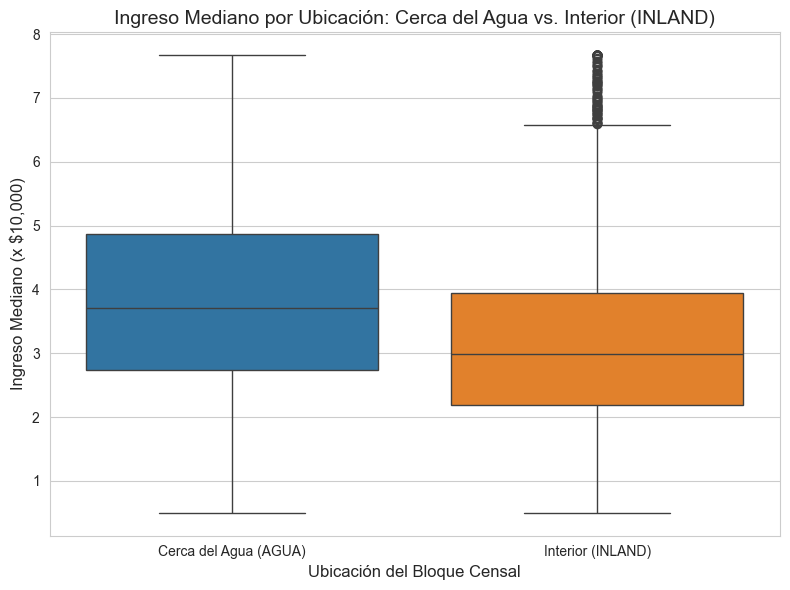


--- Mediana del Ingreso por Ubicación ---
ubicacion_agua_vs_tierra
AGUA      $37,059.00
INLAND    $29,844.00
Name: median_income, dtype: object


In [42]:
# 1. Generar el Box Plot para la Comparación de Ingresos
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='ubicacion_agua_vs_tierra', # Eje X: AGUA vs. INLAND
    y='median_income',            # Eje Y: El ingreso mediano a comparar
    data=df_final,                # Usamos el DataFrame COMPLETO
    palette=['#1f77b4', '#ff7f0e'] 
)

# Configuración del gráfico
plt.title(f'Ingreso Mediano por Ubicación: Cerca del Agua vs. Interior (INLAND)', fontsize=14)
plt.xlabel("Ubicación del Bloque Censal", fontsize=12)
plt.ylabel('Ingreso Mediano (x $10,000)', fontsize=12)
plt.xticks([0, 1], ['Cerca del Agua (AGUA)', 'Interior (INLAND)'])
plt.tight_layout()
plt.show()

# 2. Análisis Numérico (IMPRESIÓN EN CONSOLA)
print("\n--- Mediana del Ingreso por Ubicación ---")
# Agrupamos por ubicación y formateamos a USD (multiplicando por 10,000)
def format_income(x):
    return f"${x * 10000:,.2f}"

comparacion_ingreso = df_final.groupby('ubicacion_agua_vs_tierra')['median_income'].median().apply(format_income)
print(comparacion_ingreso)

## GRAFICO RELACIONADO CON median_income y la ubicacion

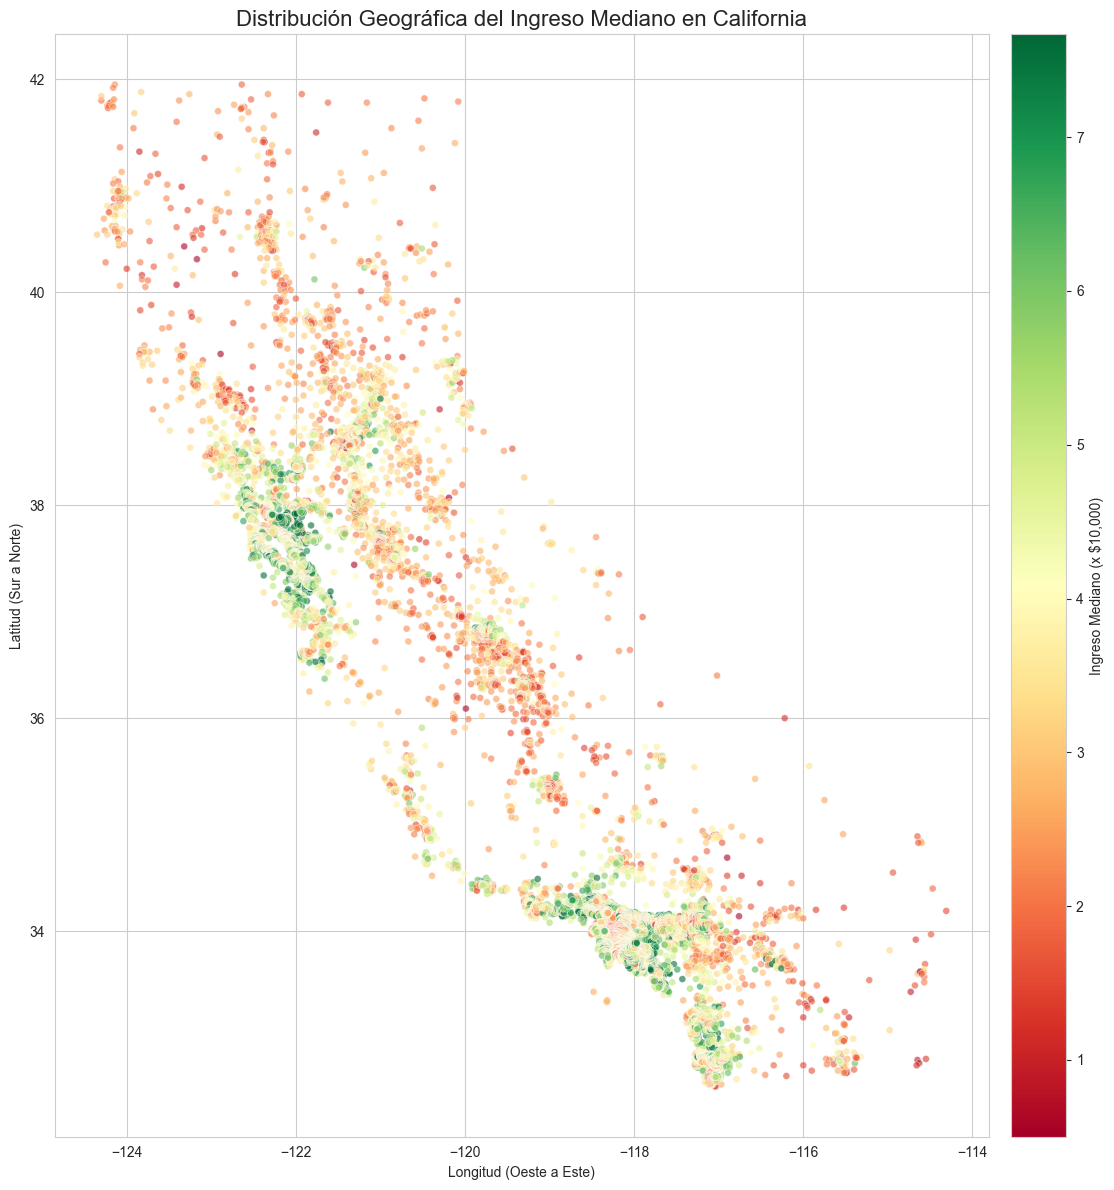

In [43]:
# --- Generar el Gráfico Geográfico Estático ---

plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

# Usamos 'median_income' para el color (hue)
scatter = sns.scatterplot(
    x='longitude',
    y='latitude',
    data=df_final,
    hue='median_income', # Colorea los puntos por el ingreso mediano
    palette='RdYlGn',     # Esquema de color: Rojo (alto) a Verde (bajo)
    s=25,                 # Tamaño del punto
    alpha=0.6,            # Transparencia
    legend=False          # Ocultamos la leyenda automática de Seaborn
)

# --- Añadir la Barra de Color (Colorbar) ---
# Usamos un mapeador escalar para que la barra de color muestre el rango de ingresos
norm = plt.Normalize(df_final['median_income'].min(), df_final['median_income'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([]) 

plt.colorbar(sm, ax=scatter.axes, label='Ingreso Mediano (x $10,000)', pad=0.02)


# --- Títulos y Etiquetas ---
plt.title('Distribución Geográfica del Ingreso Mediano en California', fontsize=16)
plt.xlabel('Longitud (Oeste a Este)')
plt.ylabel('Latitud (Sur a Norte)')
plt.tight_layout()
plt.show()

### Analisis de Impacto segmentado de Doble Condicion sobre el precio mediano de la vivienda.
### Objetivo: determinar si la edad de la vivienda tiene efecto diferente en el precio en dos categorias espesificas (<1H OCEAN y NEAR OCEAN)

In [44]:
# --- 1. Definición de Filtros ---

# Condición de proximidad: <1H OCEAN
filtro_1h_ocean = df_final['ocean_proximity'] == '<1H OCEAN'
# Condición de proximidad: NEAR OCEAN
filtro_near_ocean = df_final['ocean_proximity'] == 'NEAR OCEAN'
# Condición de edad: Viejas (True)
filtro_viejas = df_final['es_vieja'] == True
# Condición de edad: Nuevas/Medianas (False)
filtro_nuevas = df_final['es_vieja'] == False

# --- 2. Creación de Subconjuntos (DataFrames) ---

# 1. Viejas en <1H OCEAN
df_viejas_1h = df_final[filtro_1h_ocean & filtro_viejas]

# 2. Nuevas/Medianas en <1H OCEAN
df_nuevas_1h = df_final[filtro_1h_ocean & filtro_nuevas]

# 3. Viejas en NEAR OCEAN
df_viejas_near = df_final[filtro_near_ocean & filtro_viejas]

# 4. Nuevas/Medianas en NEAR OCEAN
df_nuevas_near = df_final[filtro_near_ocean & filtro_nuevas]

# --- 3. Cálculo de la Mediana ---

mediana_viejas_1h = df_viejas_1h['median_house_value'].median()
mediana_nuevas_1h = df_nuevas_1h['median_house_value'].median()
mediana_viejas_near = df_viejas_near['median_house_value'].median()
mediana_nuevas_near = df_nuevas_near['median_house_value'].median()

# --- 4. Consolidación de Resultados ---

# Creamos un DataFrame con los resultados reales para el gráfico
datos_reales = pd.DataFrame({
    'Proximidad': ['<1H OCEAN', '<1H OCEAN', 'NEAR OCEAN', 'NEAR OCEAN'],
    'Edad': ['Viejas', 'Nuevas/Medianas', 'Viejas', 'Nuevas/Medianas'],
    'Precio_Mediano': [
        mediana_viejas_1h,
        mediana_nuevas_1h,
        mediana_viejas_near,
        mediana_nuevas_near
    ]
})

print("--- Dataframe de Precios Medianos Reales ---")
print(datos_reales)

--- Dataframe de Precios Medianos Reales ---
   Proximidad             Edad  Precio_Mediano
0   <1H OCEAN           Viejas        182400.0
1   <1H OCEAN  Nuevas/Medianas        214350.0
2  NEAR OCEAN           Viejas        238950.0
3  NEAR OCEAN  Nuevas/Medianas        205000.0


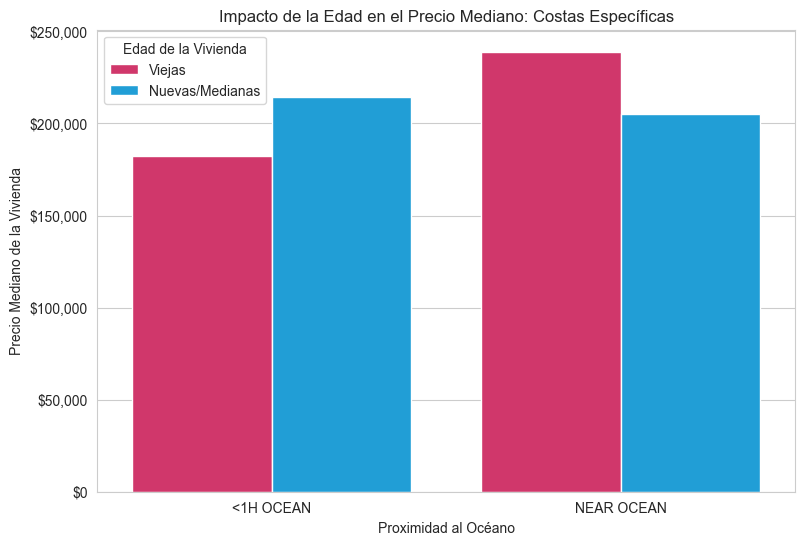

Text(0.5, 0, 'Proximidad al Océano')

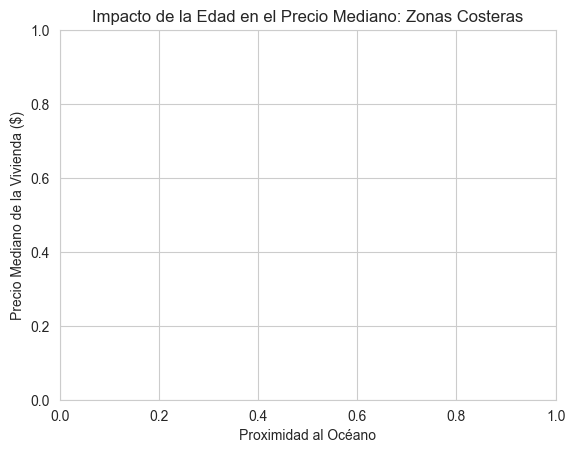

In [ ]:
plt.figure(figsize=(9, 6))

sns.barplot(
    x='Proximidad',
    y='Precio_Mediano',
    hue='Edad',
    data=datos_reales,
    palette={'Viejas': '#E91E63', 'Nuevas/Medianas': '#03A9F4'} # Rosa/Azul
)

# Formato para que el eje Y sea legible y en formato de moneda
plt.ticklabel_format(style='plain', axis='y') # le dice a Matplotlib que no muestre notacion cientifica en el eje y. Muestra un numero completo.
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}')) # gca(get current axis), selecciona el eje Y actual, aplicando un formato a las etiquetas
                                                                                  # plt.FuncFormatter, regla que transforma el numero
                                                                                  # Funcion lambda que toma un valor del tick(x) y lo formatea con simbolo de $ y de cero decimales y separador de miles (,)

plt.title('Impacto de la Edad en el Precio Mediano: Costas Específicas')
plt.ylabel('Precio Mediano de la Vivienda')
plt.xlabel('Proximidad al Océano')
plt.legend(title='Edad de la Vivienda', loc='upper left')


plt.title('Impacto de la Edad en el Precio Mediano: Zonas Costeras')
plt.ylabel('Precio Mediano de la Vivienda ($)')
plt.xlabel('Proximidad al Océano')

plt.show()


# CONCLUSION
## **Hallazgos Clave de la Exploración de Datos (EDA)**
### El analisis demostro que el precio mediano de la vivienda es impulsado por la sinergia del **Ingreso**(median_income, el factor economico dominante) y la **ubicacion geografica** es el factor dominante, mientras que la **edad de la vivienda** actua como factor de penalizacion constante en todos los submercados, especialmente en la costa.

### El análisis exploratorio confirmó la alta sensibilidad del precio a la ubicación y al ingreso, con los siguientes insights:

1. ### **Ingreso (median_income):** Es el predictor más fuerte, mostrando una alta correlación positiva con el precio de la vivienda. Las áreas cercanas al agua (AGUA) tienen un ingreso mediano significativamente más alto que las áreas del interior (INLAND).

2. ### **Dominio de la ubicacion (Proximidad al Agua):** 
### **Mayor Motor de Valor**: La proximidad al océano (NEAR OCEAN y <1H OCEAN) es, con gran diferencia, el principal impulsor de los precios. Las viviendas en estas áreas son significativamente más caras que las del interior, independientemente de su edad.
### **Segmentacion del Mercado:** Dentro de las zonas costeras, el mercado se divide claramente:
###       **NEAR OCEAN y NEAR BAY:** son mercados de alto valor, a menudo con una proporcion inusualmente alta de viviendas antiguas.
###       **<1H OCEAN:** Es el mercado mas grande y diverso, conteniendo la mayor parte del inventario(44% de viviendas nuevas y 42.5% de viviendas antiguas)


3. ### **Inpacto de la Edad(Factor penalizador):** 
### Aunque la correlacion lineal simple entre la edad y el precio era cercana a cero, el analisis segmentado revelo un patron claro en los mercados de alto valor:
### **Penalizacion consitente:** En zonas costeras (combinadas), las viviendas mas viejas, son consistentemente mas baratas que las viviendas mas nuevas, con una diferencia de -$12.500 en la mediana.
### **Valoracion de la modernidad:** esta penalizacion sugiere que el mercado, incluso en ubicaciones premium, otorga un premio de valor a la construccion moderna o de edad media.
### **Conclusion general:** la edad no confiere un "premio" historico que compense el paso del tiempo; en cambio, la modernidad es un factor que anade un "**premieo modernidad**" de mas de $12.000 en el precio.

4. ### **Conclusion de las Dimensiones Adicionales.**
* ### **Relacion Habitacion/Cama:** las viviendas mas viejas son un grupo mucho mas homogeneo en termino de numeros de habitaciones por unidad y carecen de los outliers de tamano externo que se encuentran en el grupo mas joven/medio.
* ### **Ocupacion:** Las viviendas mas viejas tienden a tener una poblacion promedio por unidad liegeramente mas baja que la viviendas mas jovenes.

### **En resumen** el factor del alto ingreso economico, permite que el mercado de las propiedades aumente por su alta demanda, permitiendo que el ususario final de alto poder adquisitivo  prefiera una buena ubicacion (en la costa del oceano, en la costa de la bahia o a 1h del oceano) y la Edad de las unidades de habitacion es el factor modulador: las poblacion que tienen un ingreso alto prefieren pagarar el precio alto en la costa, pero dentro de ese mercado costero, pagaras un premium adicional por la modernidad.